<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_eGFR%26slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [3]:
df.head()

Unnamed: 0  PatientUID  Recent_Creatinine  Recent_eGFR  \
0           0      924852               2.63         15.8   
1           1      989278               2.03         32.3   
2           2     2103792               1.05         55.9   
3           3      953611               1.03         51.1   
4           4      488150               1.94         32.6   

               Recent_Date  PatientVisitUID     Slopes  G1M2:ARB  G3M1:Statin  \
0  2560-08-07 12:32:50.527          3349148   2.754717         0           30   
1  2560-08-11 08:22:48.737          3348711 -46.720000         0            0   
2  2560-08-14 14:38:44.150          3369057  11.018868         0            0   
3  2560-08-15 02:05:01.323          3366405  17.222520         0            0   
4  2560-08-15 09:18:43.240          3356167 -79.002653         0            0   

   G5M2:NSAIDs  ...  L25:Parathyroid hormone  L26:Vitamin D  \
0            0  ...                      NaN            NaN   
1            0  ...                      NaN            NaN   
2            0  ...                      NaN            NaN   
3            0  ...                      NaN            NaN   
4            0  ...                      NaN            NaN   

   L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                        NaN                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                       17.0   

   L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                      NaN                    NaN                      NaN   
1                      NaN                    NaN                      NaN   
2                      NaN                    NaN                      NaN   
3                      NaN                    NaN                      NaN   
4                      NaN                    NaN                      NaN   

   L32:UrineProtein (24hrs)                                LabLocation  \
0                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   
1                       NaN            ห้องปฏิบัติการจุลทรรศน์วินิจฉัย   
2                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   
3                       NaN            ห้องปฏิบัติการจุลทรรศน์วินิจฉัย   
4                       NaN  ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร   

                  LabCwhen  
0  2559-08-01 08:15:57.943  
1  2559-08-01 09:14:12.527  
2  2559-08-08 09:42:53.923  
3  2559-08-06 10:35:19.840  
4  2559-08-03 08:44:33.377  

[5 rows x 94 columns]

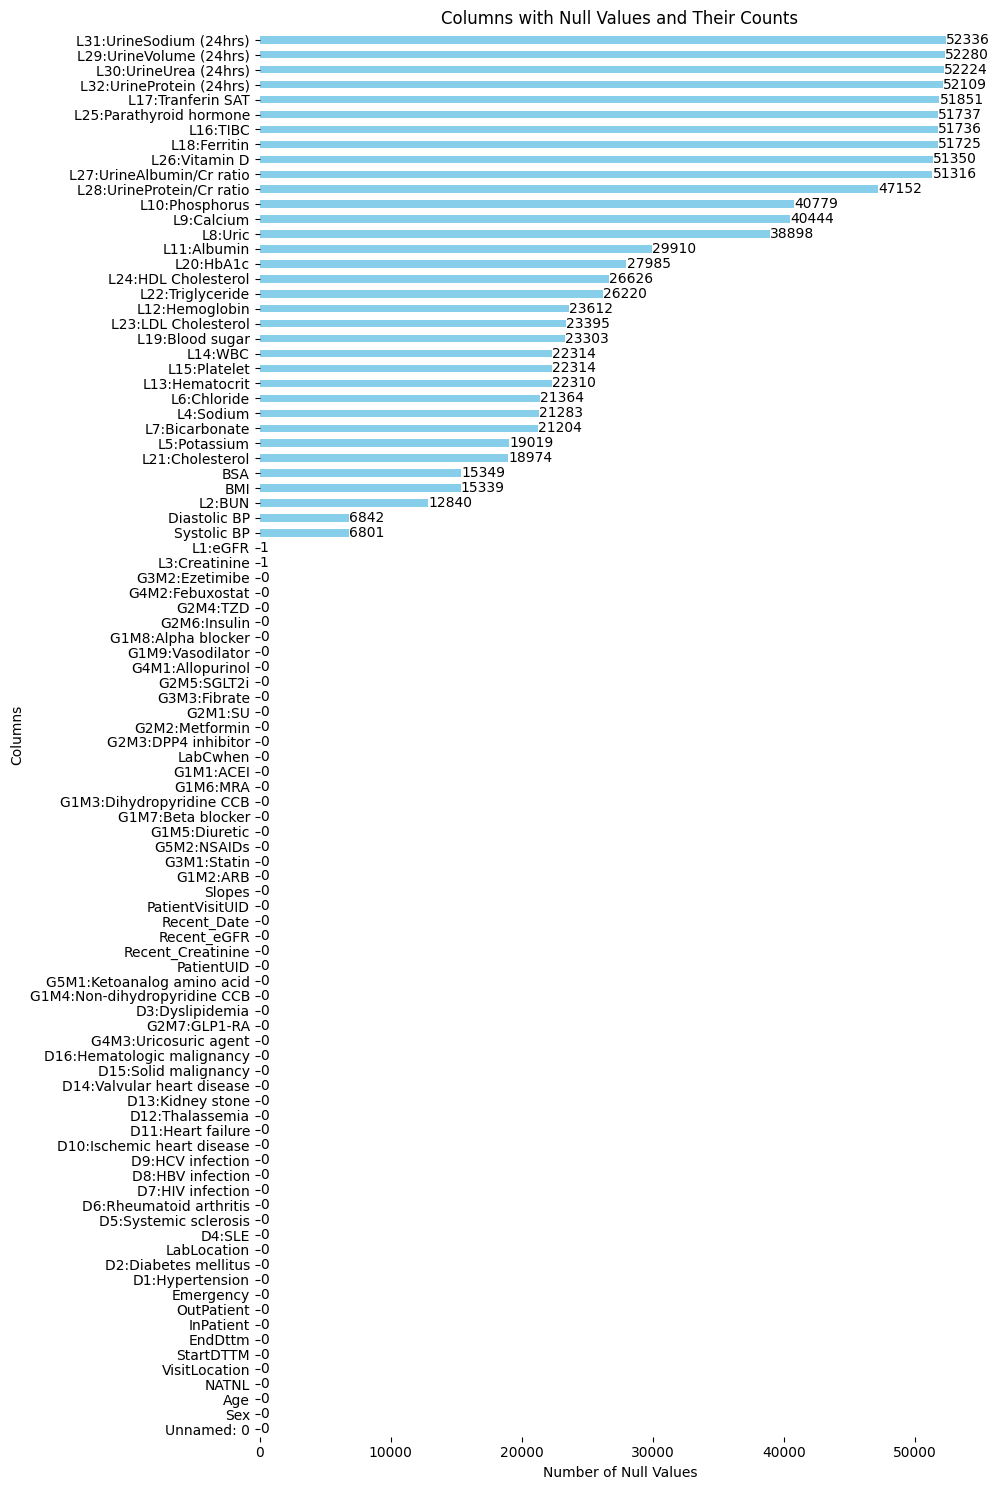

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [5]:
df.shape #ข้อมูลทั้งหมดมี 94 คอลัมน์

(52620, 94)

In [6]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "Unnamed: 0", "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin(["Unnamed: 0", "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
df = df[missing_columns]
df #36 คอลัมน์ที่มีค่าว่าง

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
0               0      924852        15.80   2.754717    NaN   NaN   
1               1      989278        32.30 -46.720000  18.71  1.70   
2               2     2103792        55.90  11.018868  23.56  1.47   
3               3      953611        51.10  17.222520  27.50  1.41   
4               4      488150        32.60 -79.002653    NaN   NaN   
...           ...         ...          ...        ...    ...   ...   
52615       52615       43763        55.28  -4.929870    NaN   NaN   
52616       52616       43763        55.28  16.017287  35.26  2.03   
52617       52617       43763        55.28 -24.861814    NaN   NaN   
52618       52618       43763        55.28   4.558175    NaN   NaN   
52619       52619       43763        55.28   2.708378  32.77  2.02   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L23:LDL Cholesterol  \
0              53.0        131.0    13.00     NaN  ...                  NaN   
1              71.0        121.0    80.30     5.2  ...                  NaN   
2              93.0        143.0    44.70    22.6  ...                  NaN   
3              60.0        120.0    33.50    28.9  ...                147.0   
4               NaN          NaN   114.20     NaN  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
52615           NaN          NaN    73.30    25.0  ...                122.0   
52616          66.0        147.0    68.10    24.8  ...                101.0   
52617           NaN          NaN    84.60    17.8  ...                113.0   
52618           NaN          NaN    56.06    23.8  ...                112.0   
52619          80.0        124.0    61.33     NaN  ...                 92.0   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                      NaN                      NaN            NaN   
1                      NaN                      NaN            NaN   
2                      NaN                      NaN            NaN   
3                     30.0                      NaN            NaN   
4                      NaN                      NaN            NaN   
...                    ...                      ...            ...   
52615                 37.0                      NaN            NaN   
52616                 41.0                      NaN            NaN   
52617                 40.0                      NaN            NaN   
52618                 39.0                      NaN            NaN   
52619                 41.0                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                       17.0   
...                          ...                        ...   
52615                        NaN                        NaN   
52616                        NaN                        NaN   
52617                        NaN                        NaN   
52618                        NaN                        NaN   
52619                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
...                        ...                    ...   
52615                      NaN                    NaN   
52616                      NaN                    NaN   
52617                      NaN                    NaN   
52618                      NaN                   

#แบ่งระยะโรคไตตามค่า eGFR 5 ระยะ
* ระยะที่ 1 มีค่า > 90 ขึ้นไป
* ระยะที่ 2  มีค่าอยู่ระหว่าง 89-60
* ระยะที่ 3  มีค่าอยุ๋ระหว่าง 59-30
* ระยะที่ 4 มีค่าอยู่ระหว่าง 29-15
* ระยะที่ 5 มีค่า <15 ลงไป

In [9]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value > 90:
        return 'ระยะที่ 1'
    elif 89 >= eGFR_value >= 60:
        return 'ระยะที่ 2'
    elif 59 >= eGFR_value >= 30:
        return 'ระยะที่ 3'
    elif 29 >= eGFR_value >= 15:
        return 'ระยะที่ 4'
    else:
        return 'ระยะที่ 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
df['eGFR_Category'] = df['Recent_eGFR'].apply(categorize_eGFR)
df

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
0               0      924852        15.80   2.754717    NaN   NaN   
1               1      989278        32.30 -46.720000  18.71  1.70   
2               2     2103792        55.90  11.018868  23.56  1.47   
3               3      953611        51.10  17.222520  27.50  1.41   
4               4      488150        32.60 -79.002653    NaN   NaN   
...           ...         ...          ...        ...    ...   ...   
52615       52615       43763        55.28  -4.929870    NaN   NaN   
52616       52616       43763        55.28  16.017287  35.26  2.03   
52617       52617       43763        55.28 -24.861814    NaN   NaN   
52618       52618       43763        55.28   4.558175    NaN   NaN   
52619       52619       43763        55.28   2.708378  32.77  2.02   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
0              53.0        131.0    13.00     NaN  ...                  NaN   
1              71.0        121.0    80.30     5.2  ...                  NaN   
2              93.0        143.0    44.70    22.6  ...                  NaN   
3              60.0        120.0    33.50    28.9  ...                 30.0   
4               NaN          NaN   114.20     NaN  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
52615           NaN          NaN    73.30    25.0  ...                 37.0   
52616          66.0        147.0    68.10    24.8  ...                 41.0   
52617           NaN          NaN    84.60    17.8  ...                 40.0   
52618           NaN          NaN    56.06    23.8  ...                 39.0   
52619          80.0        124.0    61.33     NaN  ...                 41.0   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
0                          NaN            NaN                        NaN   
1                          NaN            NaN                        NaN   
2                          NaN            NaN                        NaN   
3                          NaN            NaN                        NaN   
4                          NaN            NaN                        NaN   
...                        ...            ...                        ...   
52615                      NaN            NaN                        NaN   
52616                      NaN            NaN                        NaN   
52617                      NaN            NaN                        NaN   
52618                      NaN            NaN                        NaN   
52619                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                           17.0                      NaN   
...                          ...                      ...   
52615                        NaN                      NaN   
52616                        NaN                      NaN   
52617                        NaN                      NaN   
52618                        NaN                      NaN   
52619                        NaN                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
...                      ...                      ...   
52615                    NaN                      NaN   
52616                    NaN                      NaN   
52617                    NaN                      NaN   
5

In [10]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['Unnamed: 0', 'PatientUID', 'Slopes', 'Recent_eGFR','eGFR_Category'] + [col for col in df.columns if col not in ['Unnamed: 0', 'PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
data1 = df[column_order]
data1

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
0               0      924852   2.754717        15.80     ระยะที่ 4    NaN   
1               1      989278 -46.720000        32.30     ระยะที่ 3  18.71   
2               2     2103792  11.018868        55.90     ระยะที่ 3  23.56   
3               3      953611  17.222520        51.10     ระยะที่ 3  27.50   
4               4      488150 -79.002653        32.60     ระยะที่ 3    NaN   
...           ...         ...        ...          ...           ...    ...   
52615       52615       43763  -4.929870        55.28     ระยะที่ 3    NaN   
52616       52616       43763  16.017287        55.28     ระยะที่ 3  35.26   
52617       52617       43763 -24.861814        55.28     ระยะที่ 3    NaN   
52618       52618       43763   4.558175        55.28     ระยะที่ 3    NaN   
52619       52619       43763   2.708378        55.28     ระยะที่ 3  32.77   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
0       NaN          53.0        131.0    13.00  ...                  NaN   
1      1.70          71.0        121.0    80.30  ...                  NaN   
2      1.47          93.0        143.0    44.70  ...                  NaN   
3      1.41          60.0        120.0    33.50  ...                147.0   
4       NaN           NaN          NaN   114.20  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
52615   NaN           NaN          NaN    73.30  ...                122.0   
52616  2.03          66.0        147.0    68.10  ...                101.0   
52617   NaN           NaN          NaN    84.60  ...                113.0   
52618   NaN           NaN          NaN    56.06  ...                112.0   
52619  2.02          80.0        124.0    61.33  ...                 92.0   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                      NaN                      NaN            NaN   
1                      NaN                      NaN            NaN   
2                      NaN                      NaN            NaN   
3                     30.0                      NaN            NaN   
4                      NaN                      NaN            NaN   
...                    ...                      ...            ...   
52615                 37.0                      NaN            NaN   
52616                 41.0                      NaN            NaN   
52617                 40.0                      NaN            NaN   
52618                 39.0                      NaN            NaN   
52619                 41.0                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                            NaN                        NaN   
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                       17.0   
...                          ...                        ...   
52615                        NaN                        NaN   
52616                        NaN                        NaN   
52617                        NaN                        NaN   
52618                        NaN                        NaN   
52619                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
...                        ...                    ...   
52615                      NaN                    NaN   
52616                      NaN                    NaN   
52617                      NaN    

ดูแต่ละระยะเพื่อดูค่าว่างที่เกิดขึ้น

## stage1

In [11]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 1'
stage1 = data1[data1['eGFR_Category'] == 'ระยะที่ 1']
stage1 # 622 rows

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
93             93     1407655 -11.244949       100.30     ระยะที่ 1    NaN   
107           107     2304528  72.432222       109.50     ระยะที่ 1    NaN   
133           133     1946107 -59.475059       100.50     ระยะที่ 1    NaN   
200           200     1138015 -14.531616        95.50     ระยะที่ 1   0.22   
211           211     1486805   2.085714        95.90     ระยะที่ 1  24.56   
...           ...         ...        ...          ...           ...    ...   
52124       52124      218497 -20.531250        97.68     ระยะที่ 1    NaN   
52125       52125      218497   9.258910        97.68     ระยะที่ 1    NaN   
52126       52126      218497  -3.510562        97.68     ระยะที่ 1    NaN   
52127       52127      218497  13.338929        97.68     ระยะที่ 1    NaN   
52243       52243     3314119  10.568365       122.30     ระยะที่ 1    NaN   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
93      NaN          71.0         94.0   126.90  ...                  NaN   
107     NaN          99.0        145.0    20.20  ...                  NaN   
133     NaN           NaN          NaN    97.20  ...                138.0   
200    7.25          76.0        115.0    79.80  ...                  NaN   
211    1.57          71.0        124.0    55.50  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
52124   NaN          68.0        147.0    83.10  ...                  NaN   
52125   NaN           NaN          NaN    62.40  ...                  NaN   
52126   NaN          67.0        161.0    74.50  ...                 91.0   
52127   NaN          67.0        146.0    70.22  ...                  NaN   
52243   NaN         106.0        144.0    27.69  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
93                     NaN                      NaN            NaN   
107                    NaN                      NaN            NaN   
133                   46.0                      NaN            NaN   
200                    NaN                      NaN            NaN   
211                    NaN                      NaN            NaN   
...                    ...                      ...            ...   
52124                  NaN                      NaN            NaN   
52125                  NaN                      NaN            NaN   
52126                 47.0                      NaN            NaN   
52127                  NaN                      NaN            NaN   
52243                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
93                           NaN                        NaN   
107                          NaN                        NaN   
133                          NaN                        NaN   
200                          NaN                        NaN   
211                          NaN                        NaN   
...                          ...                        ...   
52124                        NaN                        NaN   
52125                        NaN                        NaN   
52126                        NaN                        NaN   
52127                        NaN                        NaN   
52243                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
93                         NaN                    NaN   
107                        NaN                    NaN   
133                        NaN                    NaN   
200                        NaN                    NaN   
211                        NaN                    NaN   
...                        ...                    ...   
52124                      NaN                    NaN   
52125                      NaN                    NaN   
52126                      NaN    

In [12]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage1_missing = stage1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage1_missing / len(stage1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing1 = pd.DataFrame({
    'Missing Values': stage1_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing1

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Slopes                                  0            0.000000
Recent_eGFR                             0            0.000000
eGFR_Category                           0            0.000000
BMI                                   222           35.691318
BSA                                   223           35.852090
Diastolic BP                           79           12.700965
Systolic BP                            79           12.700965
L1:eGFR                                 0            0.000000
L2:BUN                                134           21.543408
L3:Creatinine                           0            0.000000
L4:Sodium                             218           35.048232
L5:Potassium                          203           32.636656
L6:Chloride                           218           35.048232
L7:Bicarbonate                        217           34.887460
L8:Uric                               531           85.369775
L9:Calcium                            426           68.488746
L10:Phosphorus                        432           69.453376
L11:Albumin                           242           38.906752
L12:Hemoglobin                        150           24.115756
L13:Hematocrit                        139           22.347267
L14:WBC                               139           22.347267
L15:Platelet                          139           22.347267
L16:TIBC                              610           98.070740
L17:Tranferin SAT                     611           98.231511
L18:Ferritin                          611           98.231511
L19:Blood sugar                       387           62.218650
L20:HbA1c                             445           71.543408
L21:Cholesterol                       224           36.012862
L22:Triglyceride                      430           69.131833
L23:LDL Cholesterol                   415           66.720257
L24:HDL Cholesterol                   439           70.578778
L25:Parathyroid hormone               607           97.588424
L26:Vitamin D                         599           96.302251
L27:UrineAlbumin/Cr ratio             619           99.517685
L28:UrineProtein/Cr ratio             555           89.228296
L29:UrineVolume (24hrs)               618           99.356913
L30:UrineUrea (24hrs)                 618           99.356913
L31:UrineSodium (24hrs)               620           99.678457
L32:UrineProtein (24hrs)              617           99.196141

In [13]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage1_sort = stage1[stage1['eGFR_Category'] == 'ระยะที่ 1'].sort_values(by='Recent_eGFR', ascending=True)
stage1_sort

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
43116       43116      449755  -4.718523        90.04     ระยะที่ 1  23.67   
6458         6458     2767452 -34.410855        90.04     ระยะที่ 1  18.73   
6459         6459     2767452  23.485733        90.04     ระยะที่ 1    NaN   
43118       43118      449755   6.099599        90.04     ระยะที่ 1  18.28   
43117       43117      449755 -28.836962        90.04     ระยะที่ 1  23.83   
...           ...         ...        ...          ...           ...    ...   
5318         5318     2384626   7.984375       125.93     ระยะที่ 1  23.31   
5319         5319     2384626   0.795640       125.93     ระยะที่ 1    NaN   
5317         5317     2384626  79.441176       125.93     ระยะที่ 1    NaN   
51784       51784      553538 -51.636256       140.75     ระยะที่ 1    NaN   
51783       51783      553538   0.058871       140.75     ระยะที่ 1  18.88   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
43116  1.63          68.0        119.0   101.80  ...                  NaN   
6458   1.55          68.0        115.0   108.00  ...                  NaN   
6459    NaN          84.0        134.0    65.01  ...                  NaN   
43118  1.43          57.0        104.0    67.42  ...                  NaN   
43117  1.63          61.0        116.0    96.81  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
5318   1.54          93.0        132.0   100.10  ...                  NaN   
5319    NaN          99.0        144.0   108.50  ...                  NaN   
5317    NaN          86.0        152.0    42.50  ...                  NaN   
51784   NaN          67.0        103.0   142.74  ...                  NaN   
51783  1.20          68.0        108.0   142.68  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
43116                  NaN                      NaN            NaN   
6458                   NaN                      NaN            NaN   
6459                   NaN                      NaN            NaN   
43118                  NaN                      NaN            NaN   
43117                  NaN                      NaN            NaN   
...                    ...                      ...            ...   
5318                   NaN                      NaN            NaN   
5319                   NaN                      NaN            NaN   
5317                   NaN                      NaN            NaN   
51784                  NaN                      NaN            NaN   
51783                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
43116                        NaN                        NaN   
6458                         NaN                        NaN   
6459                         NaN                        NaN   
43118                        NaN                        NaN   
43117                        NaN                        NaN   
...                          ...                        ...   
5318                         NaN                        NaN   
5319                         NaN                        NaN   
5317                         NaN                       87.0   
51784                        NaN                        NaN   
51783                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
43116                      NaN                    NaN   
6458                       NaN                    NaN   
6459                       NaN                    NaN   
43118                      NaN                    NaN   
43117                      NaN                    NaN   
...                        ...                    ...   
5318                       NaN                    NaN   
5319                       NaN                    NaN   
5317                       NaN    

<Axes: >

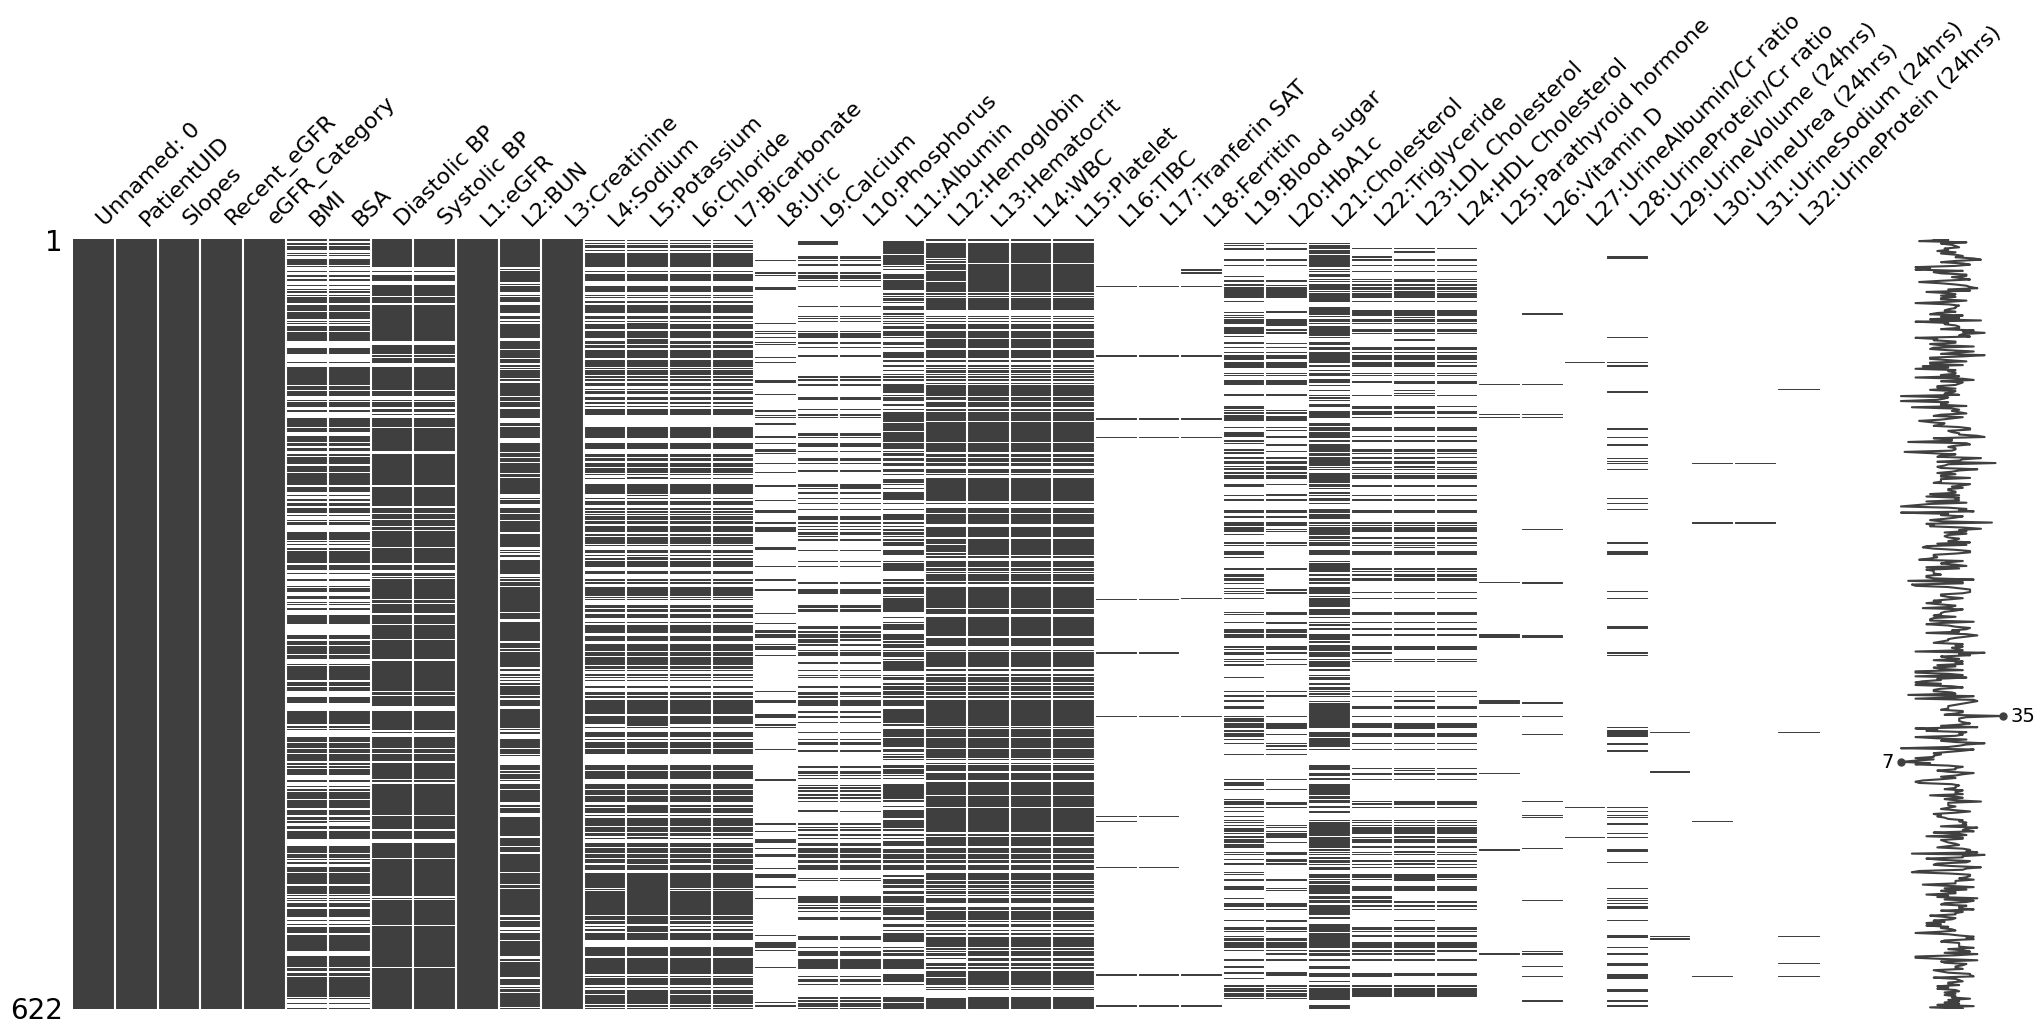

In [14]:
import missingno as msno
msno.matrix(stage1_sort)

<Axes: >

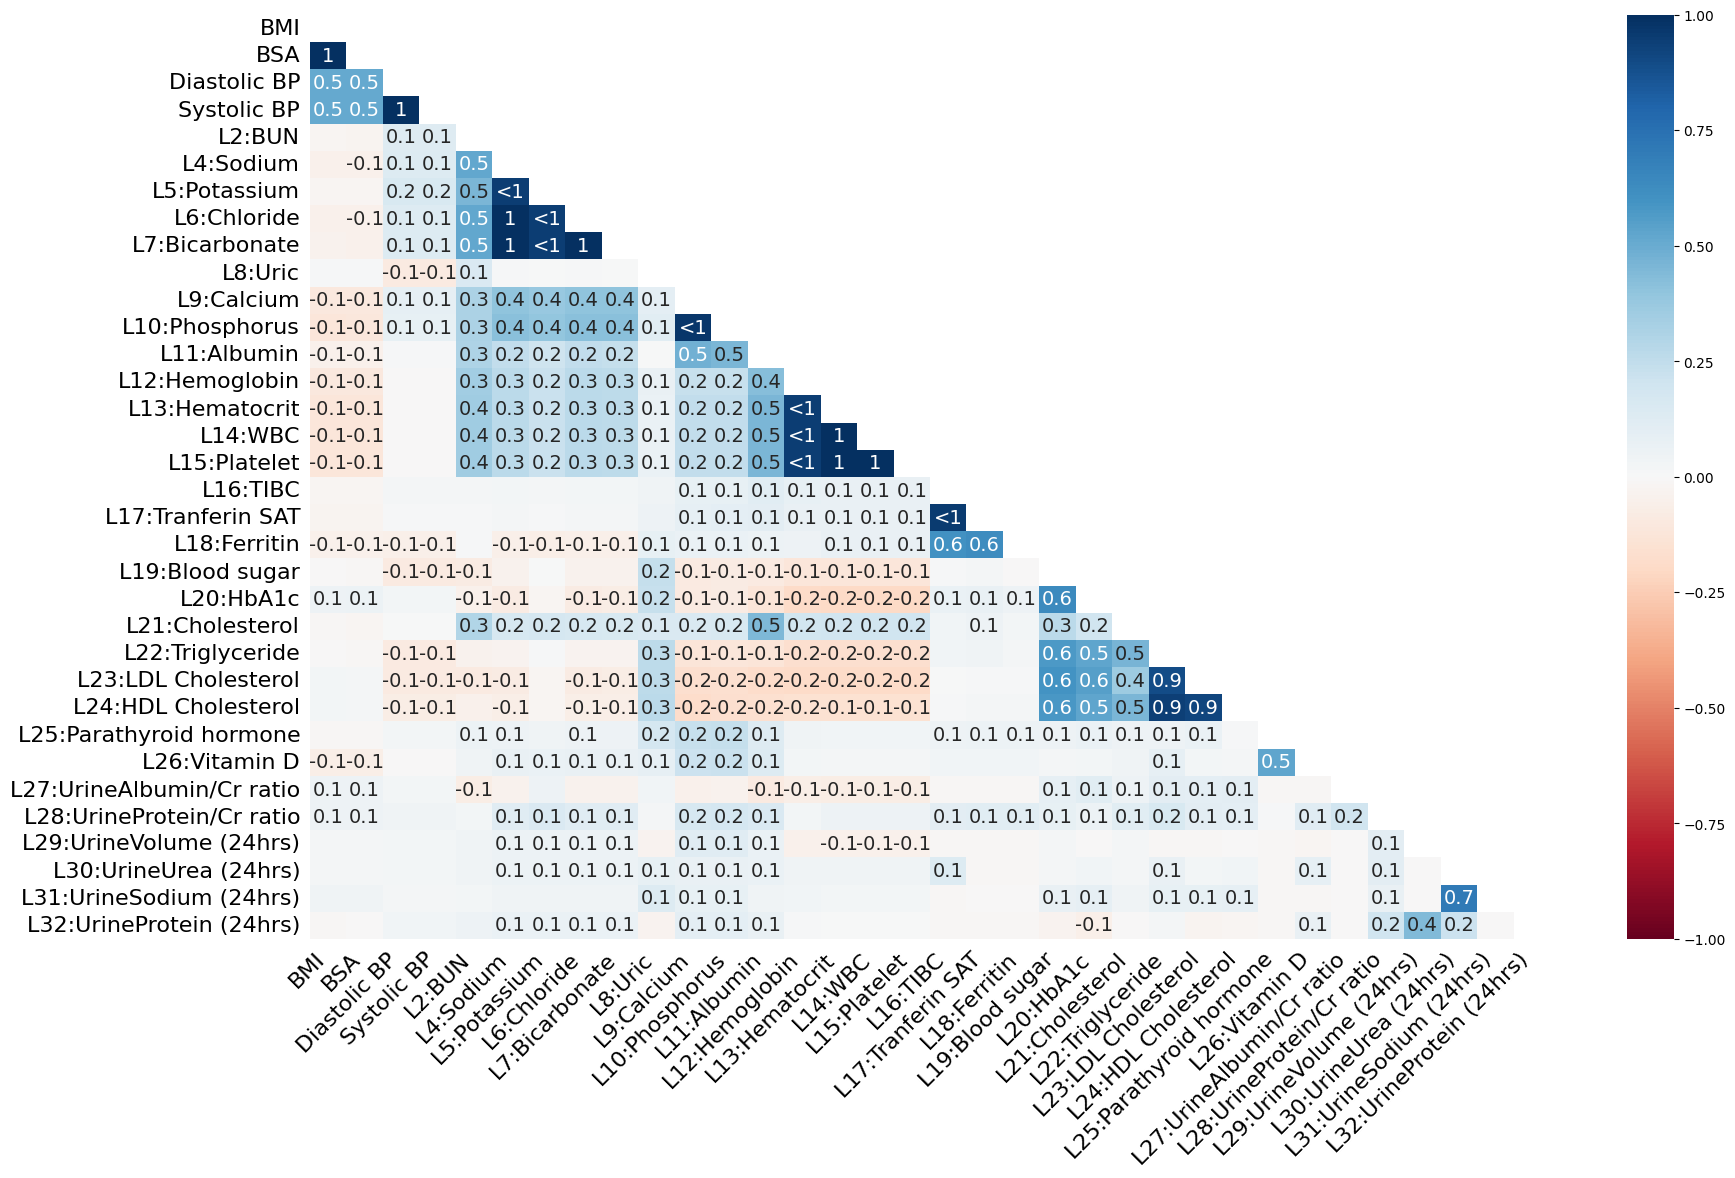

In [15]:
msno.heatmap(stage1_sort)

<Axes: >

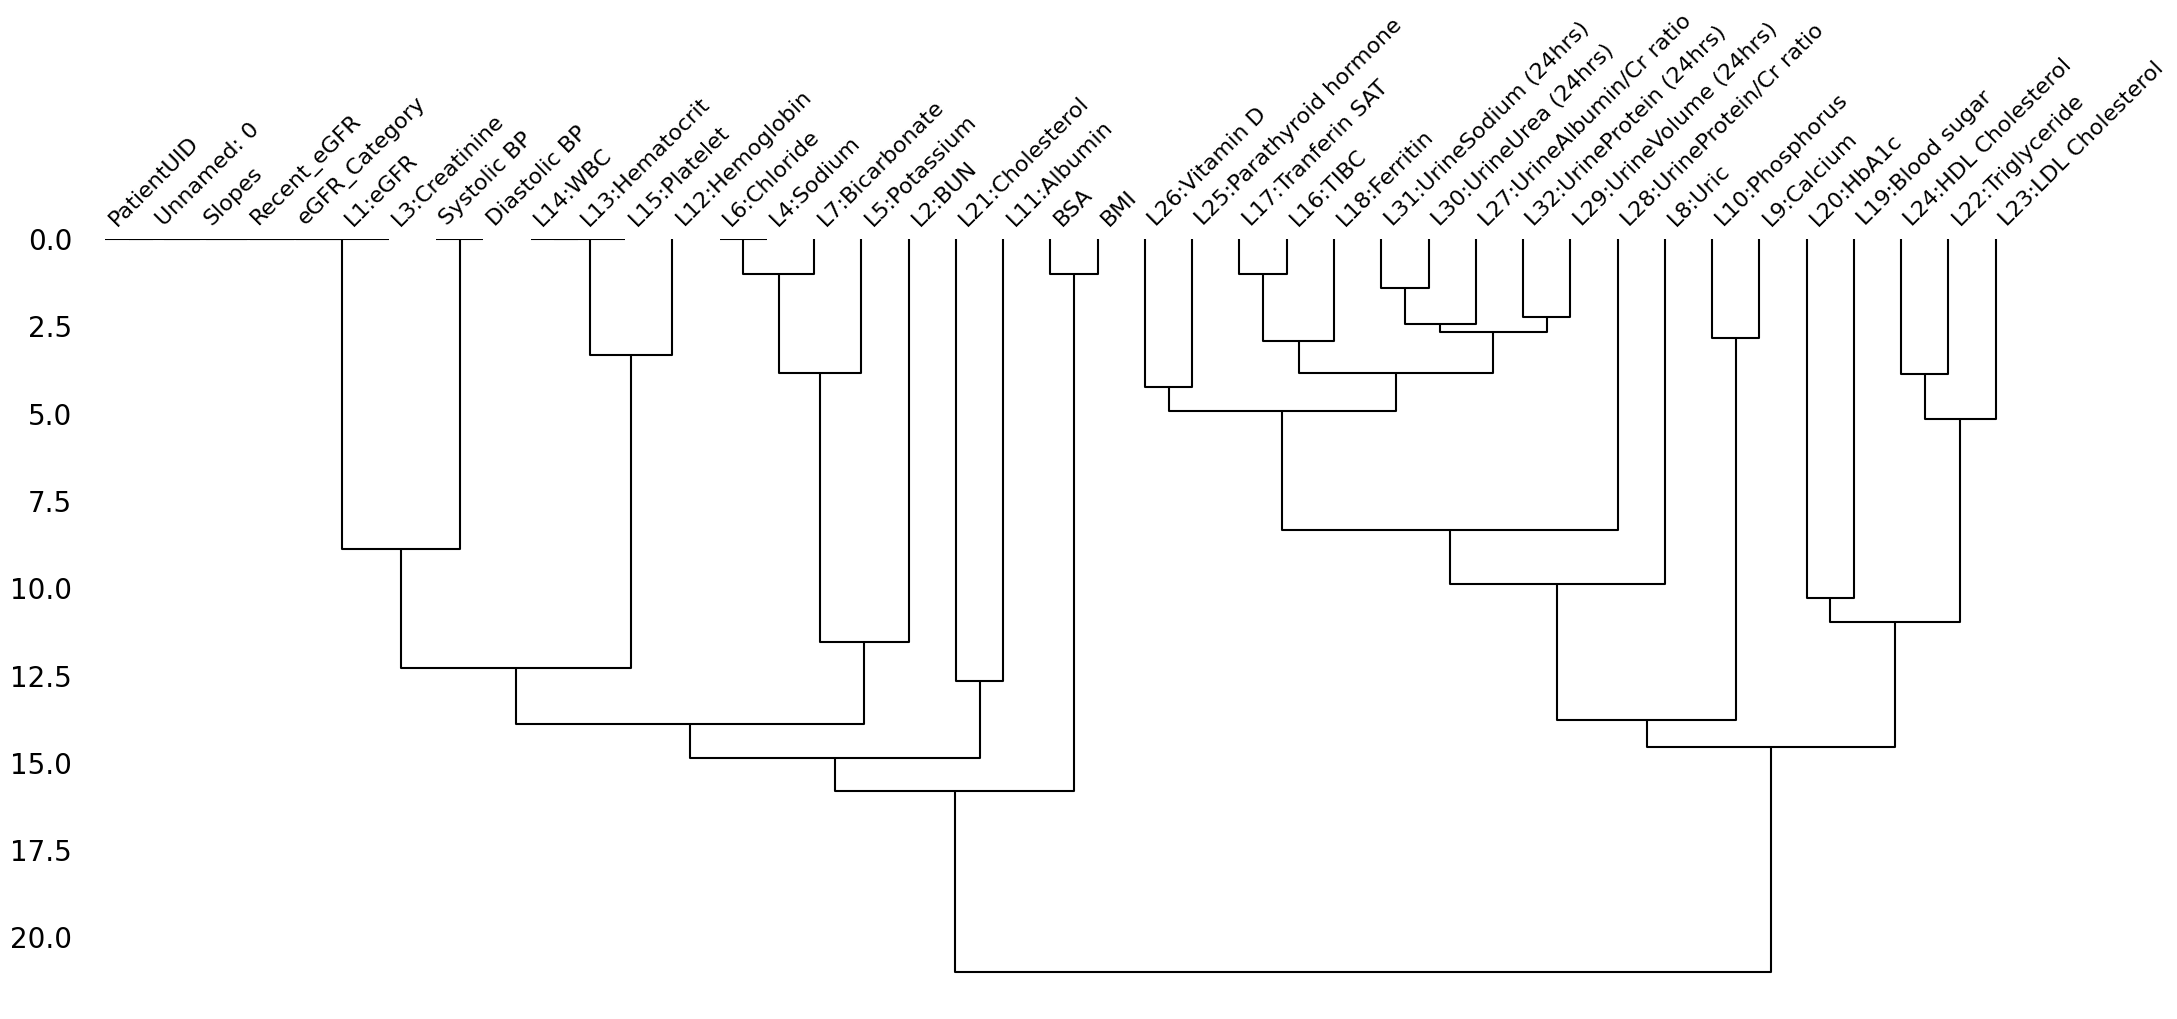

In [16]:
msno.dendrogram(stage1_sort)

##Stage2

In [17]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 2'
stage2 = data1[data1['eGFR_Category'] == 'ระยะที่ 2']
stage2 #13802 rows

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
7               7      854989  44.179221        76.10     ระยะที่ 2  29.20   
14             14     2261796   3.920716        68.80     ระยะที่ 2  24.89   
15             15     1167788  31.427793        74.70     ระยะที่ 2  21.83   
16             16      622412   4.777487        88.20     ระยะที่ 2  22.49   
20             20     2235293  14.901809        63.90     ระยะที่ 2  27.34   
...           ...         ...        ...          ...           ...    ...   
52606       52606     2180110  -9.147643        72.45     ระยะที่ 2    NaN   
52607       52607     2180110   6.725197        72.45     ระยะที่ 2    NaN   
52608       52608     2180110  -4.828042        72.45     ระยะที่ 2  23.81   
52609       52609     2180110 -14.127763        72.45     ระยะที่ 2    NaN   
52610       52610     2180110 -13.205285        72.45     ระยะที่ 2  26.26   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
7      1.75          77.0        148.0    29.50  ...                 59.0   
14     1.50          59.0        103.0    64.60  ...                 63.0   
15     1.62          58.0        130.0    59.20  ...                  NaN   
16     1.75          92.0        160.0    73.10  ...                  NaN   
20     1.73          83.0        149.0    48.10  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
52606   NaN           NaN          NaN   128.60  ...                  NaN   
52607   NaN           NaN          NaN   118.50  ...                  NaN   
52608  1.78          71.0        138.0   125.52  ...                  NaN   
52609   NaN           NaN          NaN   120.52  ...                  NaN   
52610  1.86          78.0        129.0   106.16  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
7                     70.0                      NaN            NaN   
14                    30.0                      NaN            NaN   
15                     NaN                      NaN            NaN   
16                     NaN                      NaN            NaN   
20                     NaN                      NaN            NaN   
...                    ...                      ...            ...   
52606                  NaN                      NaN            NaN   
52607                  NaN                      NaN            NaN   
52608                  NaN                      NaN            NaN   
52609                  NaN                      NaN            NaN   
52610                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
7                            NaN                        NaN   
14                           NaN                        NaN   
15                           NaN                        NaN   
16                           NaN                        NaN   
20                           NaN                        NaN   
...                          ...                        ...   
52606                        NaN                        NaN   
52607                        NaN                       23.0   
52608                        NaN                       11.0   
52609                        NaN                      184.0   
52610                        NaN                      269.0   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
7                          NaN                    NaN   
14                         NaN                    NaN   
15                         NaN                    NaN   
16                         NaN                    NaN   
20                         NaN                    NaN   
...                        ...                    ...   
52606                      NaN                    NaN   
52607                      NaN                    NaN   
52608                      NaN    

In [18]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage2_missing = stage2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage2_missing / len(stage2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing2 = pd.DataFrame({
    'Missing Values': stage2_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing2

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Slopes                                  0            0.000000
Recent_eGFR                             0            0.000000
eGFR_Category                           0            0.000000
BMI                                  3859           27.959716
BSA                                  3863           27.988697
Diastolic BP                         1825           13.222721
Systolic BP                          1812           13.128532
L1:eGFR                                 1            0.007245
L2:BUN                               3935           28.510361
L3:Creatinine                           1            0.007245
L4:Sodium                            6383           46.246921
L5:Potassium                         5720           41.443269
L6:Chloride                          6397           46.348355
L7:Bicarbonate                       6357           46.058542
L8:Uric                             10545           76.401971
L9:Calcium                          11207           81.198377
L10:Phosphorus                      11278           81.712795
L11:Albumin                          7916           57.354007
L12:Hemoglobin                       6353           46.029561
L13:Hematocrit                       6016           43.587886
L14:WBC                              6016           43.587886
L15:Platelet                         6016           43.587886
L16:TIBC                            13631           98.761049
L17:Tranferin SAT                   13654           98.927692
L18:Ferritin                        13628           98.739313
L19:Blood sugar                      6187           44.826837
L20:HbA1c                            7654           55.455731
L21:Cholesterol                      4710           34.125489
L22:Triglyceride                     6644           48.137951
L23:LDL Cholesterol                  6006           43.515433
L24:HDL Cholesterol                  6790           49.195769
L25:Parathyroid hormone             13638           98.811766
L26:Vitamin D                       13513           97.906101
L27:UrineAlbumin/Cr ratio           13473           97.616287
L28:UrineProtein/Cr ratio           12570           91.073757
L29:UrineVolume (24hrs)             13736           99.521808
L30:UrineUrea (24hrs)               13744           99.579771
L31:UrineSodium (24hrs)             13774           99.797131
L32:UrineProtein (24hrs)            13710           99.333430

In [19]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage2_sort = stage2[stage2['eGFR_Category'] == 'ระยะที่ 2'].sort_values(by='Recent_eGFR', ascending=True)
stage2_sort

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
15750       15750     1639573   0.087112        60.00     ระยะที่ 2  23.15   
33477       33477      983840  20.051899        60.00     ระยะที่ 2    NaN   
42003       42003      804122   3.544085        60.00     ระยะที่ 2  18.50   
42002       42002      804122  -1.124210        60.00     ระยะที่ 2  17.94   
1960         1960     1522490 -12.369928        60.00     ระยะที่ 2    NaN   
...           ...         ...        ...          ...           ...    ...   
34460       34460     2148565  10.508395        88.92     ระยะที่ 2  21.23   
34461       34461     2148565  16.493545        88.92     ระยะที่ 2    NaN   
7951         7951     1842059   0.960526        88.92     ระยะที่ 2  26.30   
7950         7950     1842059  10.828645        88.92     ระยะที่ 2  25.26   
34459       34459     2148565 -50.273047        88.92     ระยะที่ 2    NaN   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
15750  1.58          88.0        153.0    53.90  ...                 86.0   
33477   NaN           NaN          NaN    65.30  ...                129.0   
42003  1.37          73.0        144.0    85.90  ...                  NaN   
42002  1.35          62.0        137.0    60.00  ...                101.0   
1960    NaN          77.0        121.0    67.00  ...                112.0   
...     ...           ...          ...      ...  ...                  ...   
34460  1.48          89.0        148.0    58.01  ...                  NaN   
34461   NaN          92.0        146.0    69.67  ...                  NaN   
7951   1.87          87.0        131.0    82.90  ...                  NaN   
7950   1.84          76.0        117.0    71.30  ...                  NaN   
34459   NaN           NaN          NaN   110.90  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
15750                 48.0                      NaN            NaN   
33477                 46.0                      NaN            NaN   
42003                  NaN                      NaN            NaN   
42002                 49.0                      NaN            NaN   
1960                  38.0                      NaN            NaN   
...                    ...                      ...            ...   
34460                  NaN                      NaN            NaN   
34461                  NaN                      NaN            NaN   
7951                   NaN                      NaN            NaN   
7950                   NaN                      NaN            NaN   
34459                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
15750                        NaN                        NaN   
33477                        NaN                        NaN   
42003                        NaN                        NaN   
42002                        NaN                        NaN   
1960                         NaN                        NaN   
...                          ...                        ...   
34460                        NaN                        NaN   
34461                        NaN                        NaN   
7951                         NaN                        NaN   
7950                         NaN                        NaN   
34459                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
15750                      NaN                    NaN   
33477                      NaN                    NaN   
42003                      NaN                    NaN   
42002                      NaN                    NaN   
1960                       NaN                    NaN   
...                        ...                    ...   
34460                      NaN                    NaN   
34461                      NaN                    NaN   
7951                       NaN    

<Axes: >

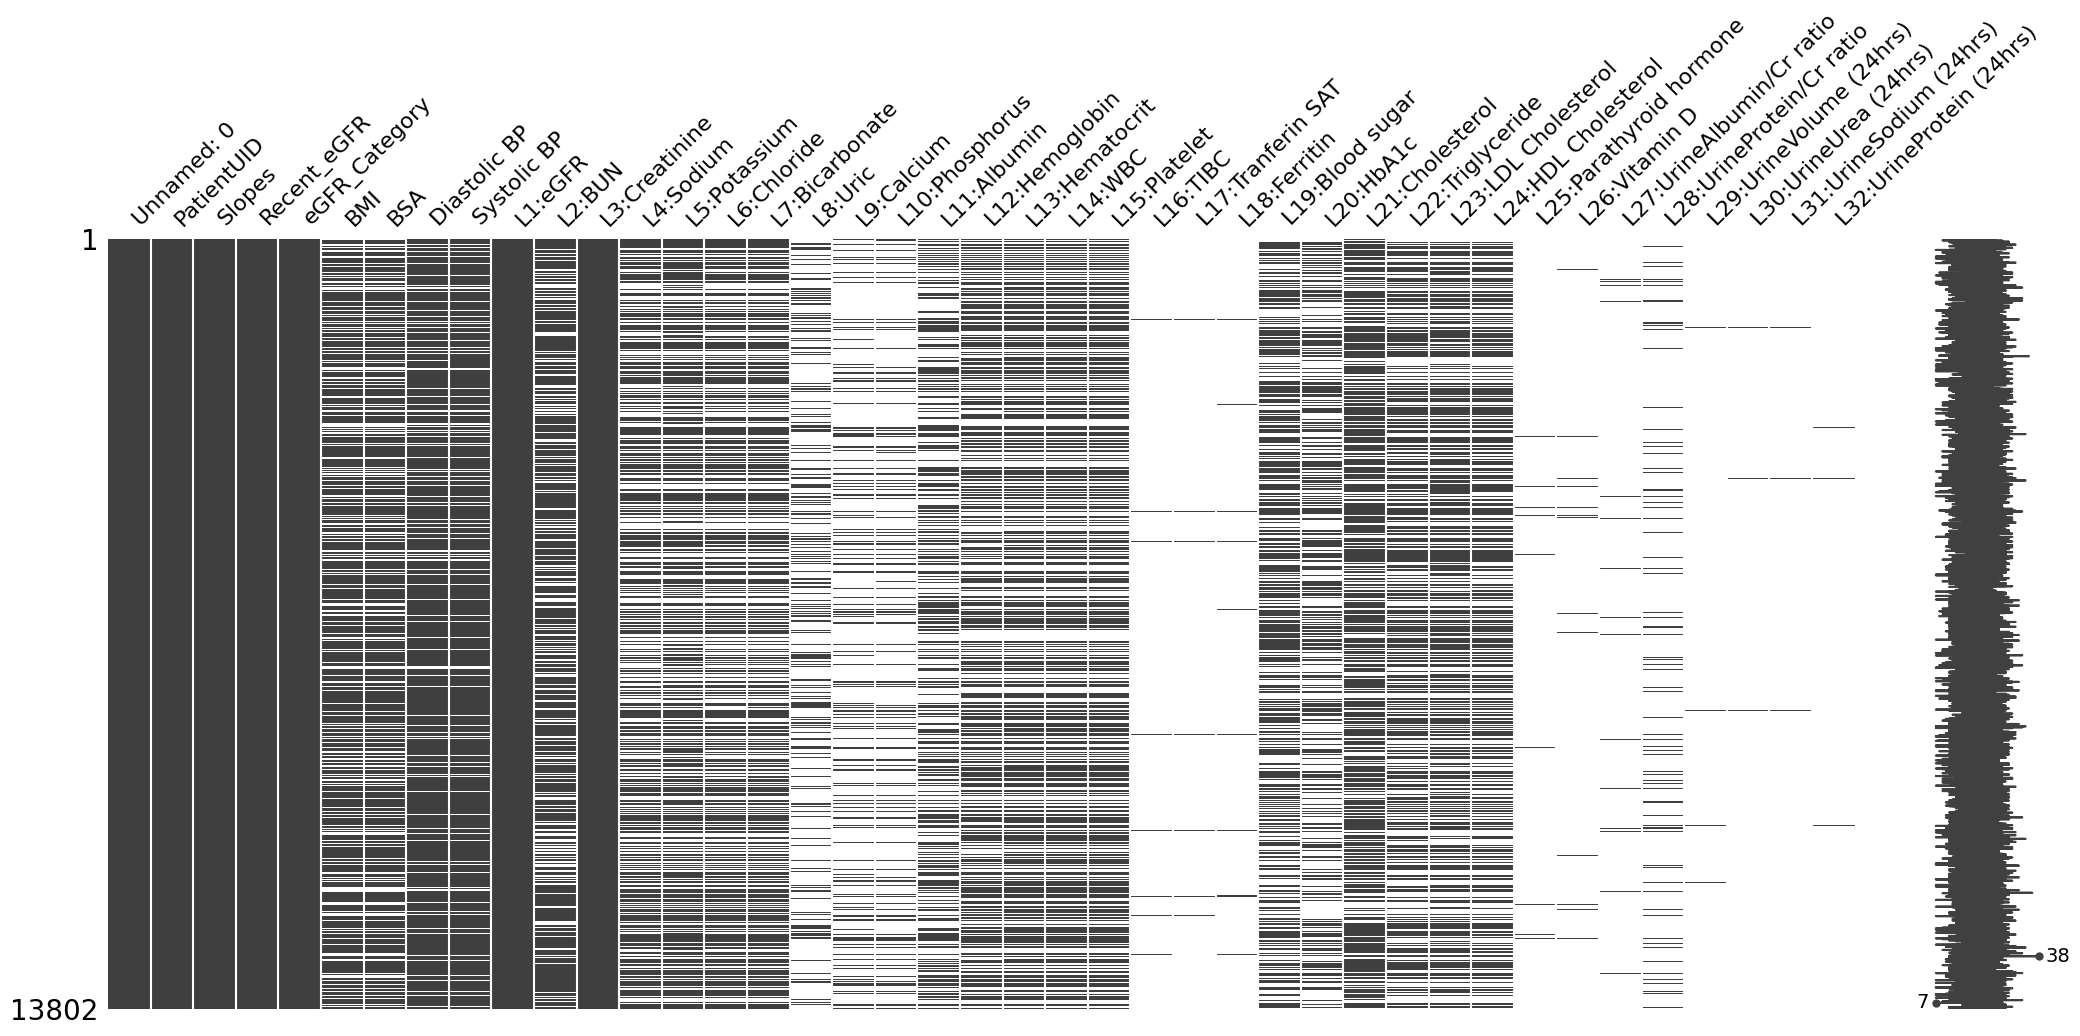

In [20]:
msno.matrix(stage2_sort)

<Axes: >

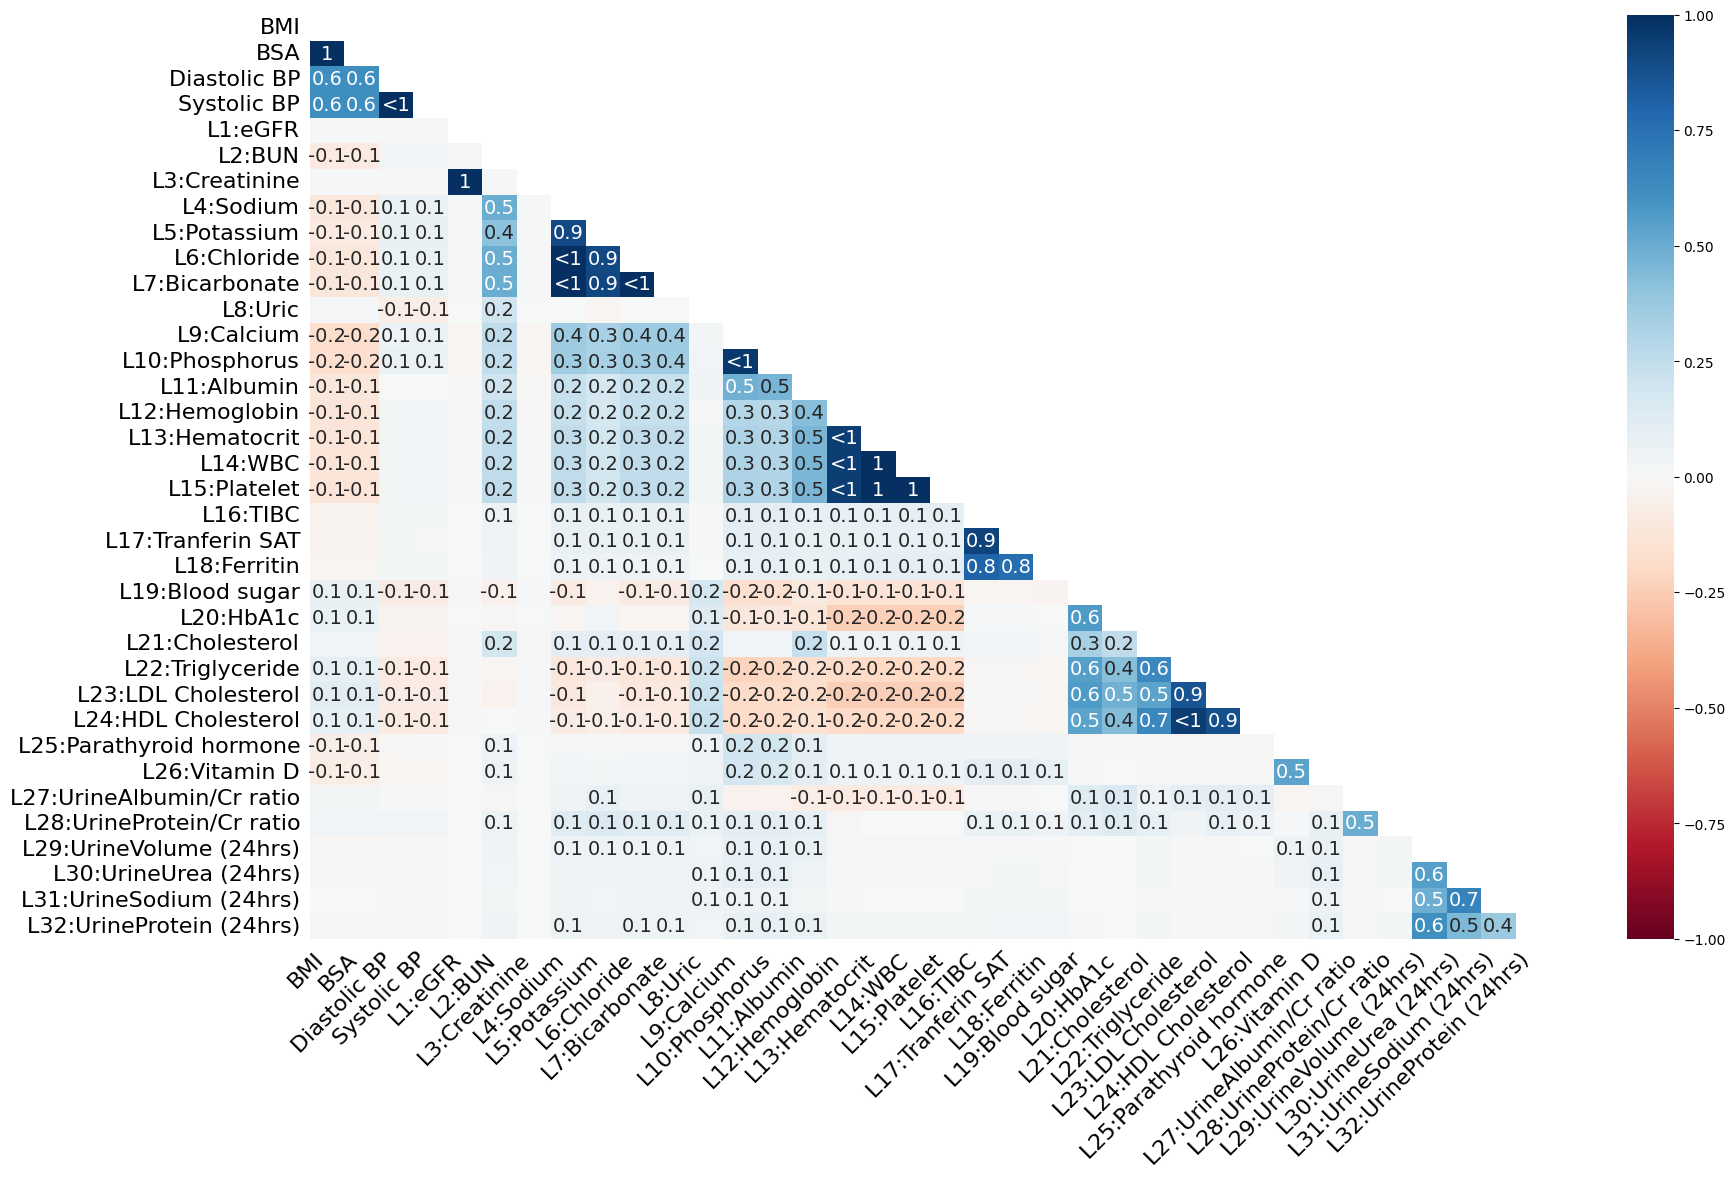

In [21]:
msno.heatmap(stage2_sort)

<Axes: >

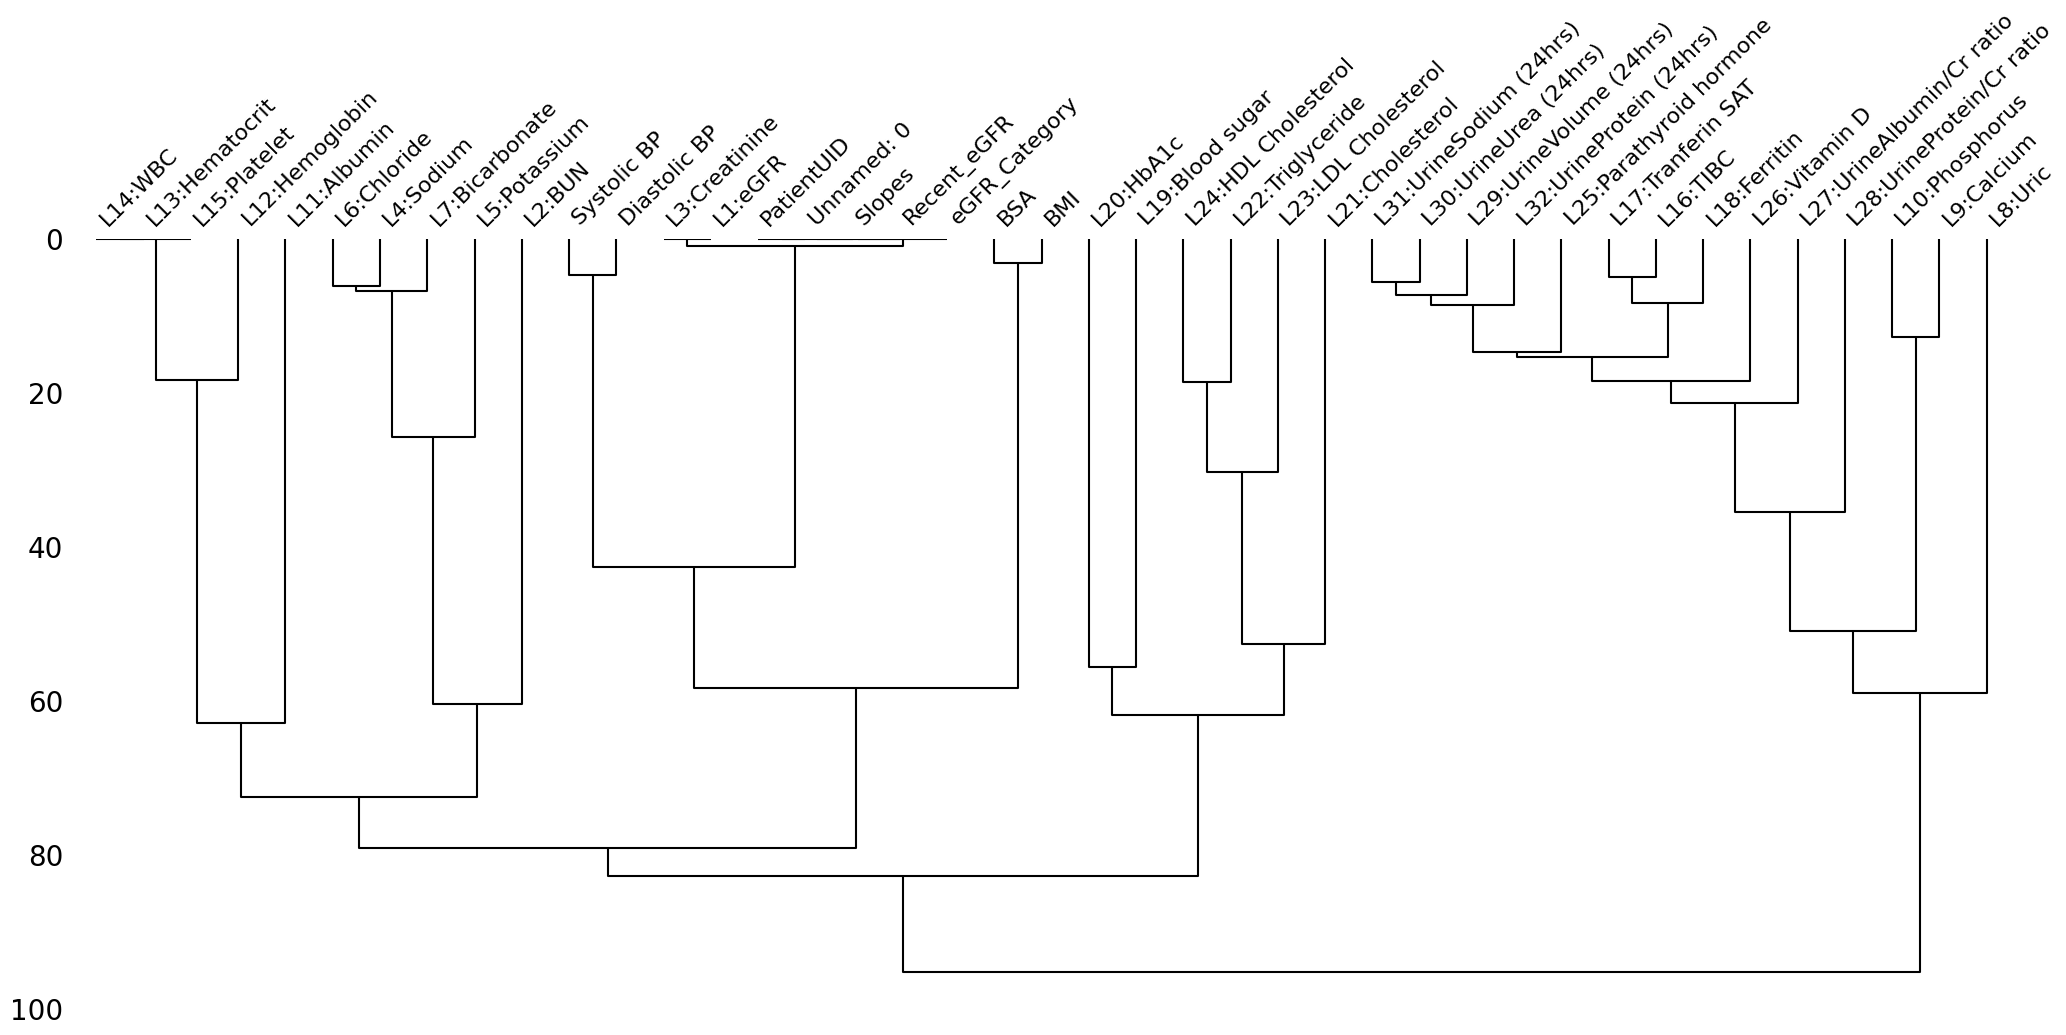

In [22]:
msno.dendrogram(stage2_sort)

##stage 3

In [23]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3 = data1[data1['eGFR_Category'] == 'ระยะที่ 3']
stage3 #29767 rows

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
1               1      989278 -46.720000        32.30     ระยะที่ 3  18.71   
2               2     2103792  11.018868        55.90     ระยะที่ 3  23.56   
3               3      953611  17.222520        51.10     ระยะที่ 3  27.50   
4               4      488150 -79.002653        32.60     ระยะที่ 3    NaN   
5               5     2155195   7.551724        54.10     ระยะที่ 3  24.80   
...           ...         ...        ...          ...           ...    ...   
52615       52615       43763  -4.929870        55.28     ระยะที่ 3    NaN   
52616       52616       43763  16.017287        55.28     ระยะที่ 3  35.26   
52617       52617       43763 -24.861814        55.28     ระยะที่ 3    NaN   
52618       52618       43763   4.558175        55.28     ระยะที่ 3    NaN   
52619       52619       43763   2.708378        55.28     ระยะที่ 3  32.77   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
1      1.70          71.0        121.0    80.30  ...                  NaN   
2      1.47          93.0        143.0    44.70  ...                  NaN   
3      1.41          60.0        120.0    33.50  ...                147.0   
4       NaN           NaN          NaN   114.20  ...                  NaN   
5      1.50          87.0        133.0    46.30  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
52615   NaN           NaN          NaN    73.30  ...                122.0   
52616  2.03          66.0        147.0    68.10  ...                101.0   
52617   NaN           NaN          NaN    84.60  ...                113.0   
52618   NaN           NaN          NaN    56.06  ...                112.0   
52619  2.02          80.0        124.0    61.33  ...                 92.0   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
1                      NaN                      NaN            NaN   
2                      NaN                      NaN            NaN   
3                     30.0                      NaN            NaN   
4                      NaN                      NaN            NaN   
5                      NaN                      NaN            NaN   
...                    ...                      ...            ...   
52615                 37.0                      NaN            NaN   
52616                 41.0                      NaN            NaN   
52617                 40.0                      NaN            NaN   
52618                 39.0                      NaN            NaN   
52619                 41.0                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
1                            NaN                        NaN   
2                            NaN                        NaN   
3                            NaN                        NaN   
4                            NaN                       17.0   
5                            NaN                        NaN   
...                          ...                        ...   
52615                        NaN                        NaN   
52616                        NaN                        NaN   
52617                        NaN                        NaN   
52618                        NaN                        NaN   
52619                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   
5                          NaN                    NaN   
...                        ...                    ...   
52615                      NaN                    NaN   
52616                      NaN                    NaN   
52617                      NaN    

In [24]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3_missing = stage3.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3_missing / len(stage3)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3 = pd.DataFrame({
    'Missing Values': stage3_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing3

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Slopes                                  0            0.000000
Recent_eGFR                             0            0.000000
eGFR_Category                           0            0.000000
BMI                                  8485           28.504720
BSA                                  8489           28.518158
Diastolic BP                         3909           13.131992
Systolic BP                          3890           13.068163
L1:eGFR                                 0            0.000000
L2:BUN                               7366           24.745524
L3:Creatinine                           0            0.000000
L4:Sodium                           12366           41.542648
L5:Potassium                        11012           36.993987
L6:Chloride                         12414           41.703900
L7:Bicarbonate                      12328           41.414990
L8:Uric                             21854           73.416871
L9:Calcium                          23512           78.986797
L10:Phosphorus                      23730           79.719152
L11:Albumin                         17748           59.623073
L12:Hemoglobin                      14027           47.122653
L13:Hematocrit                      13304           44.693788
L14:WBC                             13306           44.700507
L15:Platelet                        13306           44.700507
L16:TIBC                            29368           98.659589
L17:Tranferin SAT                   29419           98.830920
L18:Ferritin                        29358           98.625995
L19:Blood sugar                     12846           43.155172
L20:HbA1c                           15420           51.802331
L21:Cholesterol                     10661           35.814829
L22:Triglyceride                    14317           48.096886
L23:LDL Cholesterol                 12795           42.983841
L24:HDL Cholesterol                 14584           48.993852
L25:Parathyroid hormone             29294           98.410992
L26:Vitamin D                       29101           97.762623
L27:UrineAlbumin/Cr ratio           28949           97.251990
L28:UrineProtein/Cr ratio           26826           90.119931
L29:UrineVolume (24hrs)             29615           99.489367
L30:UrineUrea (24hrs)               29600           99.438976
L31:UrineSodium (24hrs)             29644           99.586791
L32:UrineProtein (24hrs)            29521           99.173581

In [25]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage3_sort = stage3[stage3['eGFR_Category'] == 'ระยะที่ 3'].sort_values(by='Recent_eGFR', ascending=True)
stage3_sort

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
28588       28588      755749  -6.581202        30.00     ระยะที่ 3    NaN   
28587       28587      755749  -5.412985        30.00     ระยะที่ 3  16.85   
28586       28586      755749  13.600595        30.00     ระยะที่ 3  19.29   
17069       17069      559861  -3.339802        30.03     ระยะที่ 3    NaN   
16314       16314     1383229  -0.195038        30.03     ระยะที่ 3    NaN   
...           ...         ...        ...          ...           ...    ...   
1467         1467       22554  -3.506863        59.00     ระยะที่ 3    NaN   
1450         1450     1021475  -1.088076        59.00     ระยะที่ 3  23.99   
738           738      648714   3.301508        59.00     ระยะที่ 3  22.68   
737           737      648714  -0.901235        59.00     ระยะที่ 3  18.51   
1449         1449     1021475  -0.822746        59.00     ระยะที่ 3  23.28   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
28588   NaN          60.0        136.0    41.34  ...                  NaN   
28587  1.73          63.0        140.0    37.26  ...                125.0   
28586  1.80          65.0        126.0    31.80  ...                  NaN   
17069   NaN           NaN          NaN    40.20  ...                 92.0   
16314   NaN          68.0        123.0    39.60  ...                106.0   
...     ...           ...          ...      ...  ...                  ...   
1467    NaN           NaN          NaN    62.60  ...                158.0   
1450   1.54          83.0        131.0    60.10  ...                126.0   
738    1.55          71.0        131.0    55.40  ...                161.0   
737    1.55          67.0        115.0    56.40  ...                150.0   
1449   1.52          67.0        119.0    61.20  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
28588                  NaN                      NaN            NaN   
28587                 56.0                      NaN            NaN   
28586                  NaN                      NaN            NaN   
17069                 41.0                      NaN            NaN   
16314                 44.0                      NaN           14.6   
...                    ...                      ...            ...   
1467                  55.0                      NaN            NaN   
1450                  62.0                      NaN            NaN   
738                   71.0                      NaN            NaN   
737                   77.0                      NaN            NaN   
1449                   NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
28588                        NaN                        NaN   
28587                        NaN                       48.9   
28586                        NaN                        NaN   
17069                        NaN                        NaN   
16314                        NaN                        NaN   
...                          ...                        ...   
1467                         NaN                      101.3   
1450                         NaN                        NaN   
738                          NaN                        NaN   
737                          NaN                        NaN   
1449                         NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
28588                      NaN                    NaN   
28587                      NaN                    NaN   
28586                      NaN                    NaN   
17069                      NaN                    NaN   
16314                      NaN                    NaN   
...                        ...                    ...   
1467                       NaN                    NaN   
1450                       NaN                    NaN   
738                        NaN    

<Axes: >

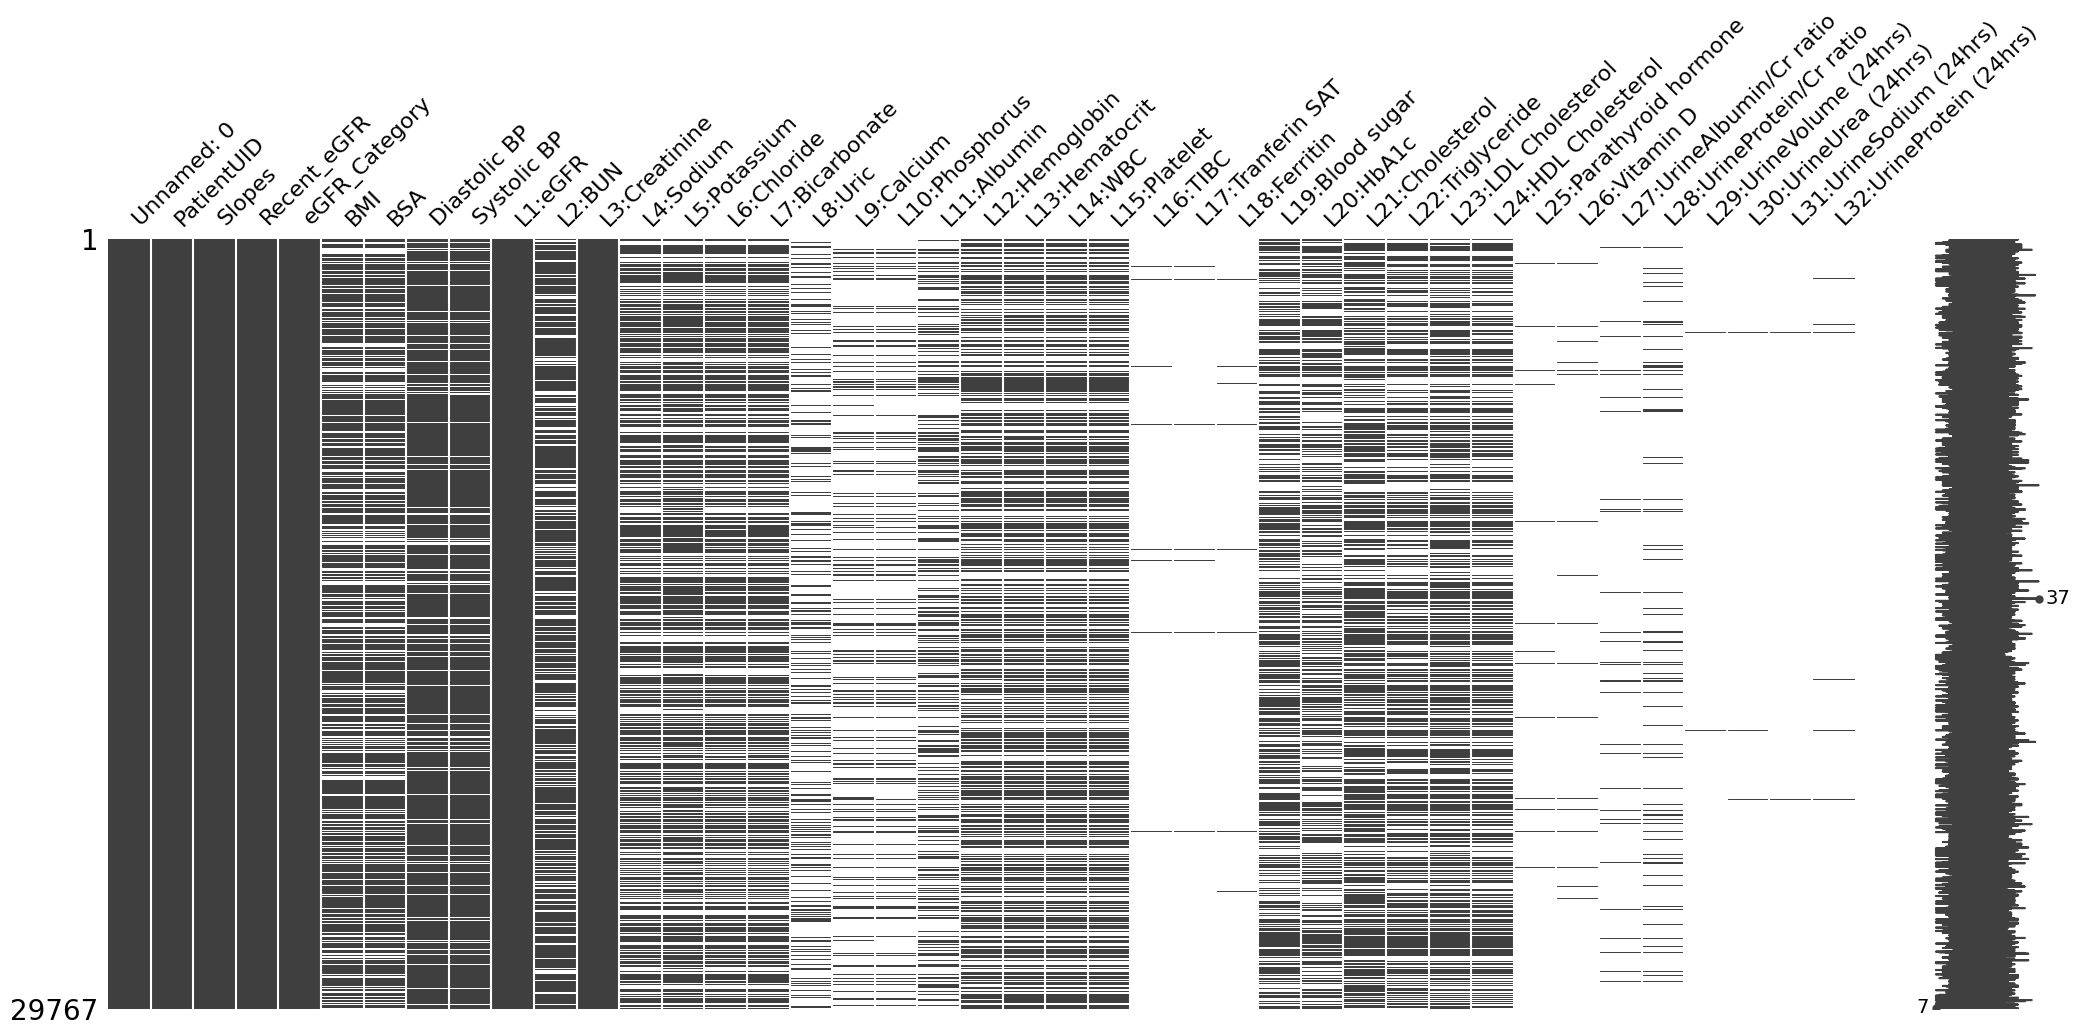

In [26]:
msno.matrix(stage3_sort)

<Axes: >

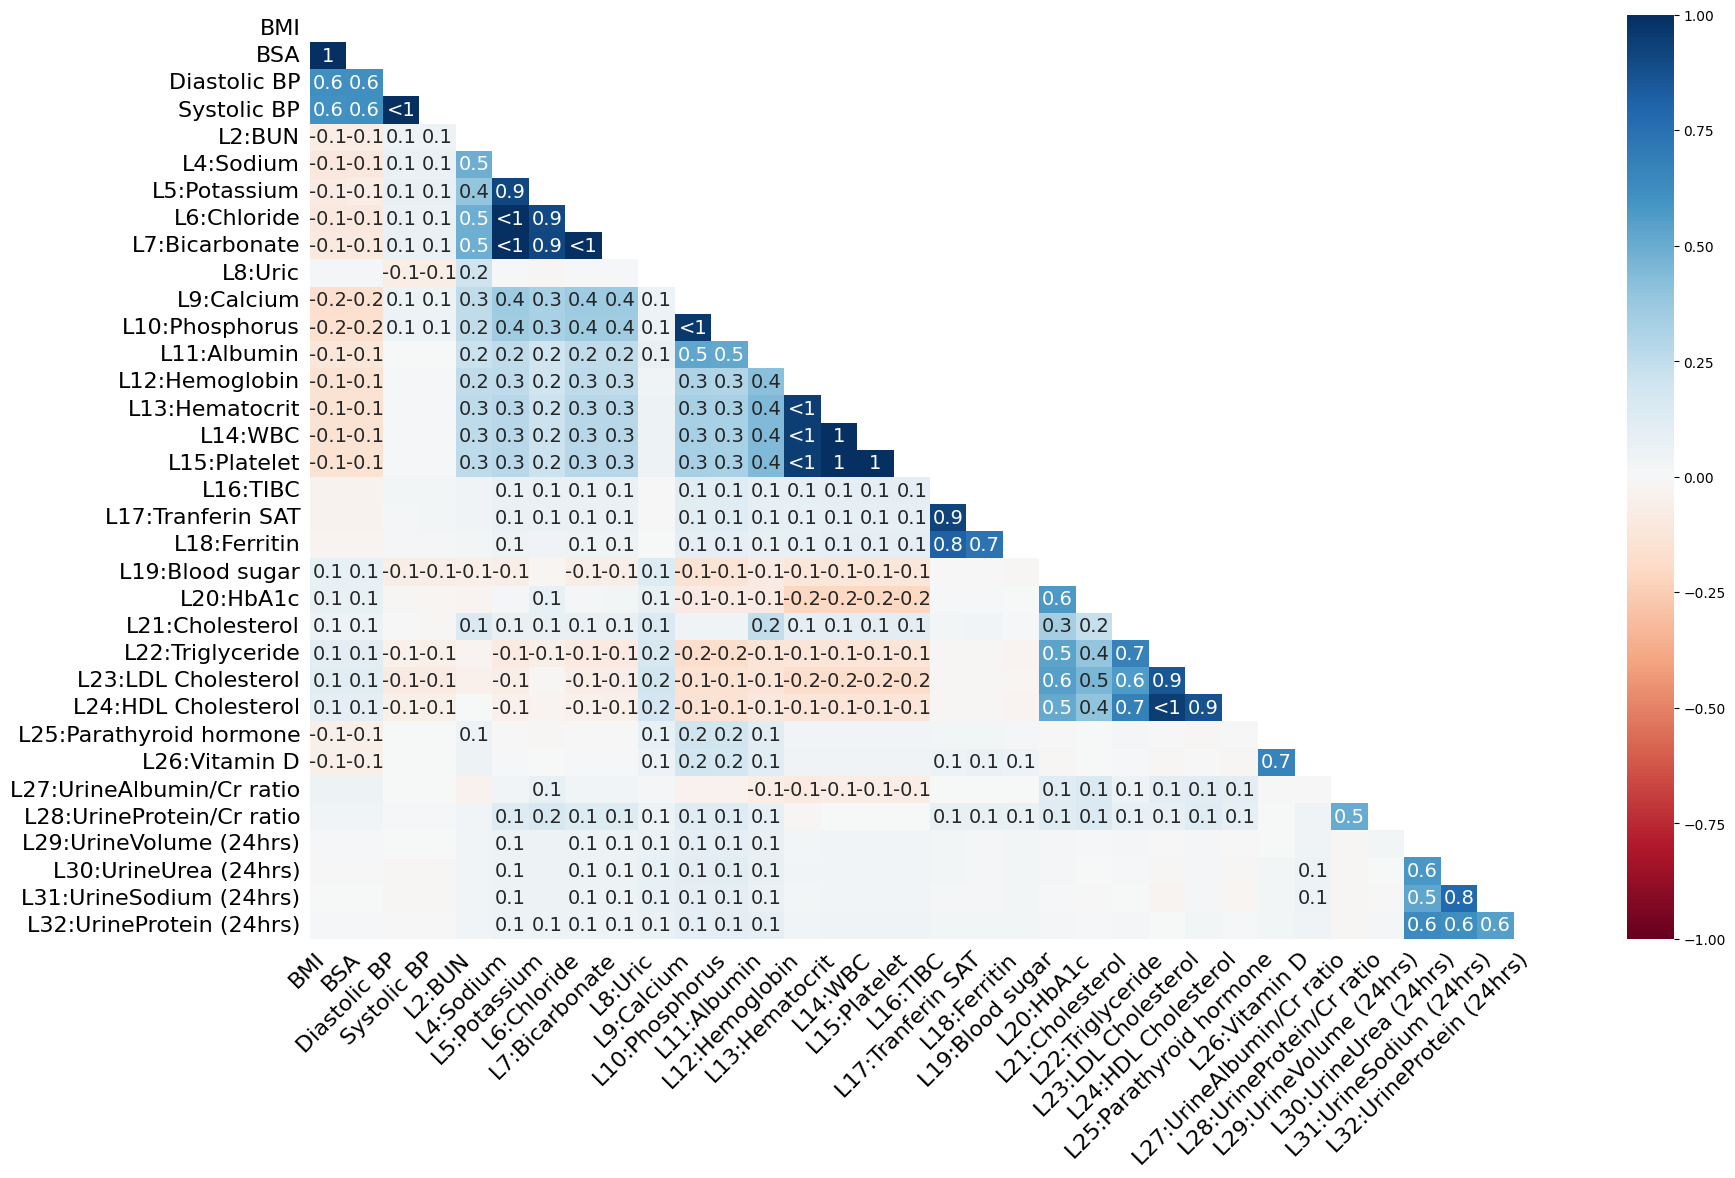

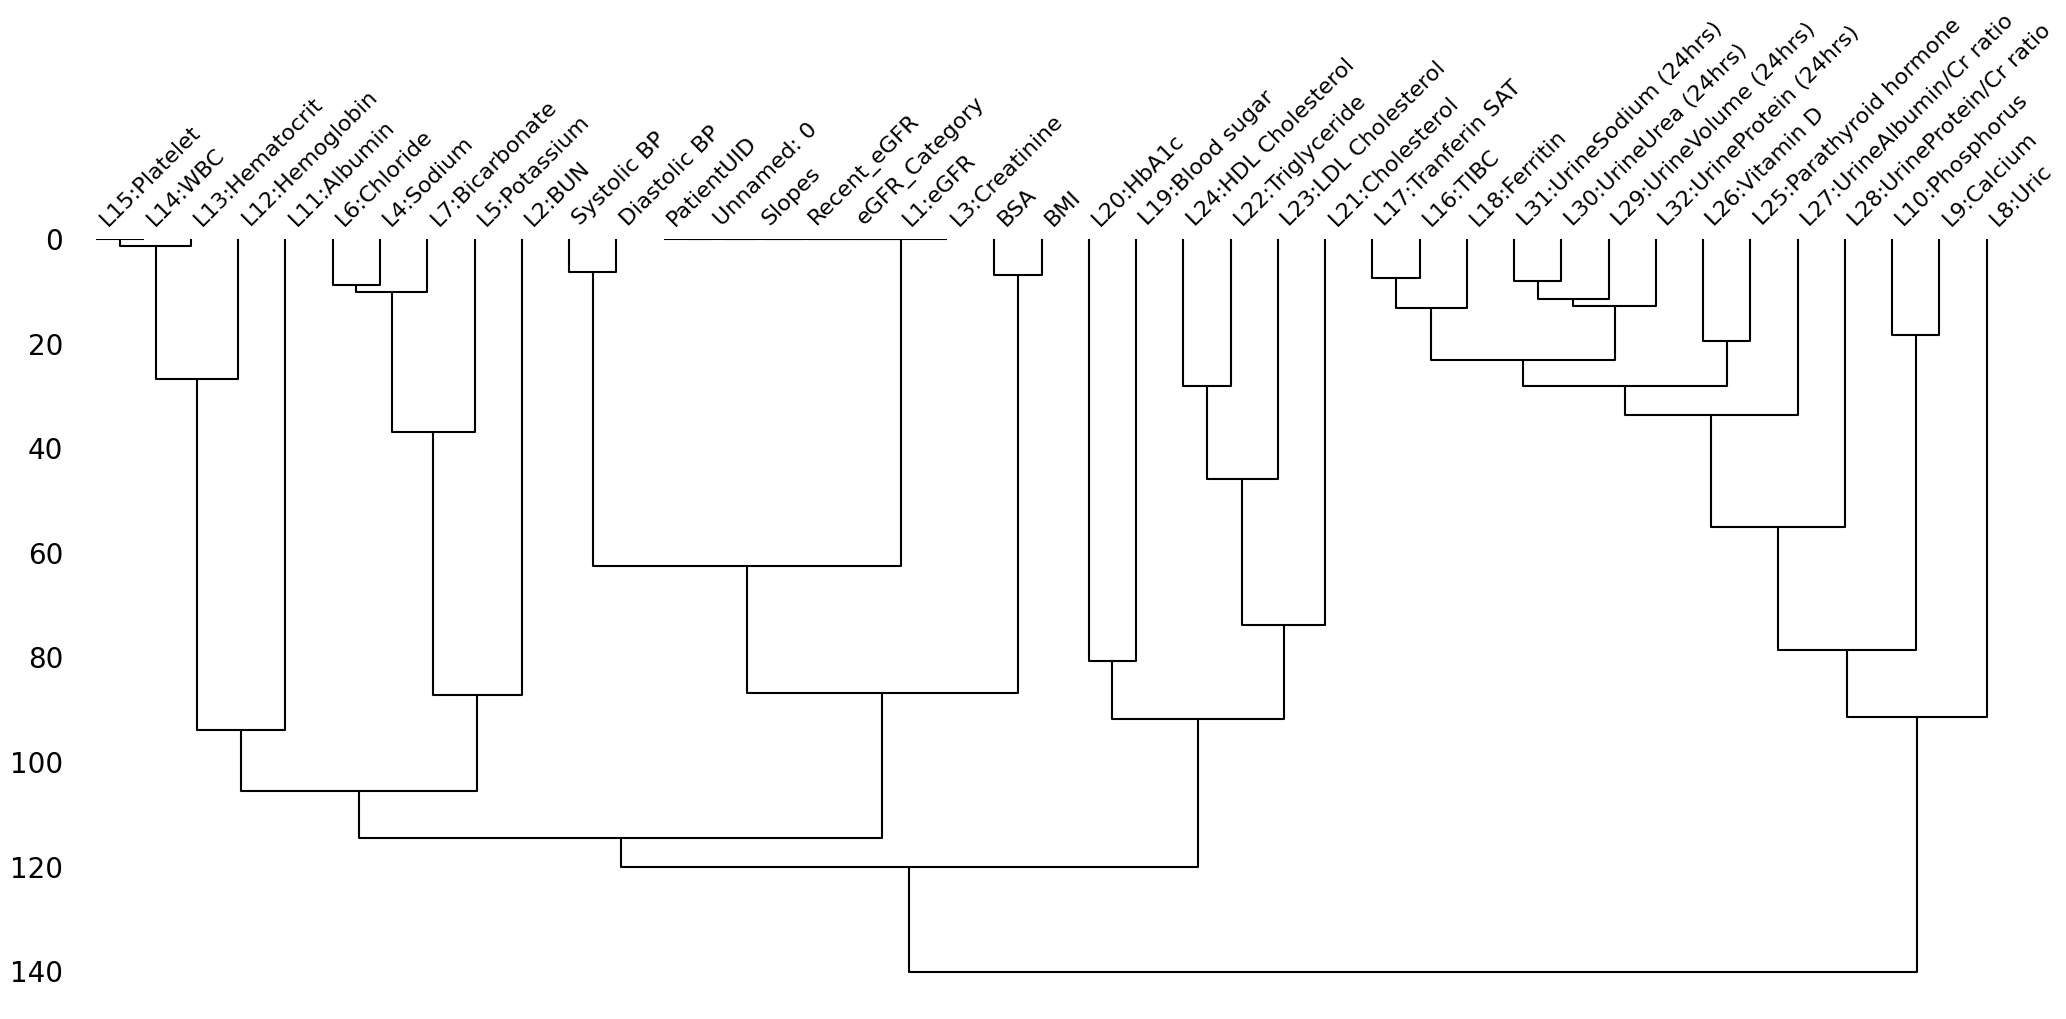

In [27]:
msno.heatmap(stage3_sort)
msno.dendrogram(stage3_sort)

##stage 4

In [28]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 4'
stage4 = data1[data1['eGFR_Category'] == 'ระยะที่ 4']
stage4 #3801 rows

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
0               0      924852   2.754717        15.80     ระยะที่ 4    NaN   
19             19     2100059   3.284062        24.30     ระยะที่ 4  19.10   
23             23     2254971  -7.745358        21.40     ระยะที่ 4    NaN   
24             24      310174 -37.971033        28.20     ระยะที่ 4    NaN   
33             33      539225  -2.977632        22.80     ระยะที่ 4  27.72   
...           ...         ...        ...          ...           ...    ...   
52588       52588     1871546   4.110000        18.81     ระยะที่ 4  14.93   
52589       52589     1871546  -5.936446        18.81     ระยะที่ 4  14.95   
52590       52590     1871546   0.629310        18.81     ระยะที่ 4    NaN   
52591       52591     1871546  -8.162727        18.81     ระยะที่ 4  15.11   
52611       52611     3170846  -1.866582        23.97     ระยะที่ 4    NaN   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
0       NaN          53.0        131.0    13.00  ...                  NaN   
19     1.39          69.0        147.0    19.60  ...                  NaN   
23      NaN           NaN          NaN    29.40  ...                  NaN   
24      NaN          84.0        146.0    73.40  ...                  NaN   
33     1.95          45.0        115.0    36.30  ...                 50.0   
...     ...           ...          ...      ...  ...                  ...   
52588  1.24          52.0        126.0    25.90  ...                 72.0   
52589  1.25          66.0        149.0    30.01  ...                  NaN   
52590   NaN           NaN          NaN    22.87  ...                 87.0   
52591  1.22          34.0        136.0    23.57  ...                 83.0   
52611   NaN          84.0        148.0    20.90  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
0                      NaN                      NaN            NaN   
19                     NaN                      NaN            NaN   
23                     NaN                      NaN            NaN   
24                     NaN                      NaN            NaN   
33                    41.0                      NaN            NaN   
...                    ...                      ...            ...   
52588                 51.0                      NaN            NaN   
52589                  NaN                      NaN            NaN   
52590                 57.0                      NaN            NaN   
52591                  NaN                      NaN            NaN   
52611                  NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
0                            NaN                        NaN   
19                           NaN                        NaN   
23                           NaN                        NaN   
24                           NaN                        NaN   
33                           NaN                        NaN   
...                          ...                        ...   
52588                        NaN                        NaN   
52589                        NaN                       23.7   
52590                        NaN                        NaN   
52591                        NaN                        NaN   
52611                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
0                          NaN                    NaN   
19                         NaN                    NaN   
23                         NaN                    NaN   
24                         NaN                    NaN   
33                         NaN                    NaN   
...                        ...                    ...   
52588                      NaN                    NaN   
52589                      NaN                    NaN   
52590                      NaN    

In [29]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage4_missing = stage4.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage4_missing / len(stage4)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing4 = pd.DataFrame({
    'Missing Values': stage4_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing4

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Slopes                                  0            0.000000
Recent_eGFR                             0            0.000000
eGFR_Category                           0            0.000000
BMI                                  1320           34.727703
BSA                                  1317           34.648777
Diastolic BP                          441           11.602210
Systolic BP                           436           11.470666
L1:eGFR                                 0            0.000000
L2:BUN                                582           15.311760
L3:Creatinine                           0            0.000000
L4:Sodium                             912           23.993686
L5:Potassium                          831           21.862668
L6:Chloride                           923           24.283083
L7:Bicarbonate                        908           23.888450
L8:Uric                              2638           69.402789
L9:Calcium                           2337           61.483820
L10:Phosphorus                       2365           62.220468
L11:Albumin                          1794           47.198106
L12:Hemoglobin                       1401           36.858721
L13:Hematocrit                       1291           33.964746
L14:WBC                              1291           33.964746
L15:Platelet                         1291           33.964746
L16:TIBC                             3685           96.948172
L17:Tranferin SAT                    3700           97.342805
L18:Ferritin                         3684           96.921863
L19:Blood sugar                      1772           46.619311
L20:HbA1c                            1957           51.486451
L21:Cholesterol                      1552           40.831360
L22:Triglyceride                     2223           58.484609
L23:LDL Cholesterol                  1919           50.486714
L24:HDL Cholesterol                  2217           58.326756
L25:Parathyroid hormone              3714           97.711129
L26:Vitamin D                        3680           96.816627
L27:UrineAlbumin/Cr ratio            3727           98.053144
L28:UrineProtein/Cr ratio            3171           83.425414
L29:UrineVolume (24hrs)              3740           98.395159
L30:UrineUrea (24hrs)                3729           98.105762
L31:UrineSodium (24hrs)              3739           98.368850
L32:UrineProtein (24hrs)             3702           97.395422

In [30]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage4_sort = stage4[stage4['eGFR_Category'] == 'ระยะที่ 4'].sort_values(by='Recent_eGFR', ascending=True)
stage4_sort

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
2926         2926     1873855  -9.222698        15.02     ระยะที่ 4  26.04   
2927         2927     1873855  -4.569395        15.02     ระยะที่ 4  25.24   
9044         9044      389518 -38.482838        15.03     ระยะที่ 4  24.24   
9043         9043      389518  -8.967162        15.03     ระยะที่ 4  26.67   
9042         9042      389518   0.548872        15.03     ระยะที่ 4  26.81   
...           ...         ...        ...          ...           ...    ...   
3574         3574      807630  12.760163        29.00     ระยะที่ 4    NaN   
3575         3575      807630 -10.631068        29.00     ระยะที่ 4    NaN   
10688       10688     1203020  -5.596021        29.00     ระยะที่ 4  20.93   
10689       10689     1203020  -0.170649        29.00     ระยะที่ 4  19.95   
10690       10690     1203020   3.537113        29.00     ระยะที่ 4  20.81   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
2926   1.66          83.0        135.0    34.90  ...                  NaN   
2927   1.64          88.0        160.0    23.10  ...                  NaN   
9044   1.73          71.0        132.0    54.31  ...                  NaN   
9043   1.80          80.0        155.0    63.40  ...                 48.0   
9042   1.80          80.0        123.0    62.60  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
3574    NaN          86.0        147.0    36.70  ...                  NaN   
3575    NaN          97.0        158.0    49.60  ...                148.0   
10688  1.44          91.0        170.0    31.20  ...                153.0   
10689  1.41          83.0        146.0    25.42  ...                 74.0   
10690  1.47          69.0        121.0    25.24  ...                 71.0   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
2926                   NaN                      NaN            NaN   
2927                   NaN                      NaN            NaN   
9044                   NaN                      NaN            NaN   
9043                  73.0                      NaN            NaN   
9042                   NaN                      NaN            NaN   
...                    ...                      ...            ...   
3574                   NaN                      NaN            NaN   
3575                  58.0                      NaN            NaN   
10688                 77.0                      NaN            NaN   
10689                 61.0                      NaN            NaN   
10690                 55.0                     93.6           42.8   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
2926                         NaN                        NaN   
2927                         NaN                        NaN   
9044                         NaN                        NaN   
9043                         NaN                        NaN   
9042                         NaN                        NaN   
...                          ...                        ...   
3574                         NaN                        NaN   
3575                         NaN                        NaN   
10688                        NaN                        NaN   
10689                     218.47                       83.9   
10690                     134.33                       46.8   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
2926                       NaN                    NaN   
2927                       NaN                    NaN   
9044                       NaN                    NaN   
9043                       NaN                    NaN   
9042                       NaN                    NaN   
...                        ...                    ...   
3574                       NaN                    NaN   
3575                       NaN                    NaN   
10688                      NaN    

<Axes: >

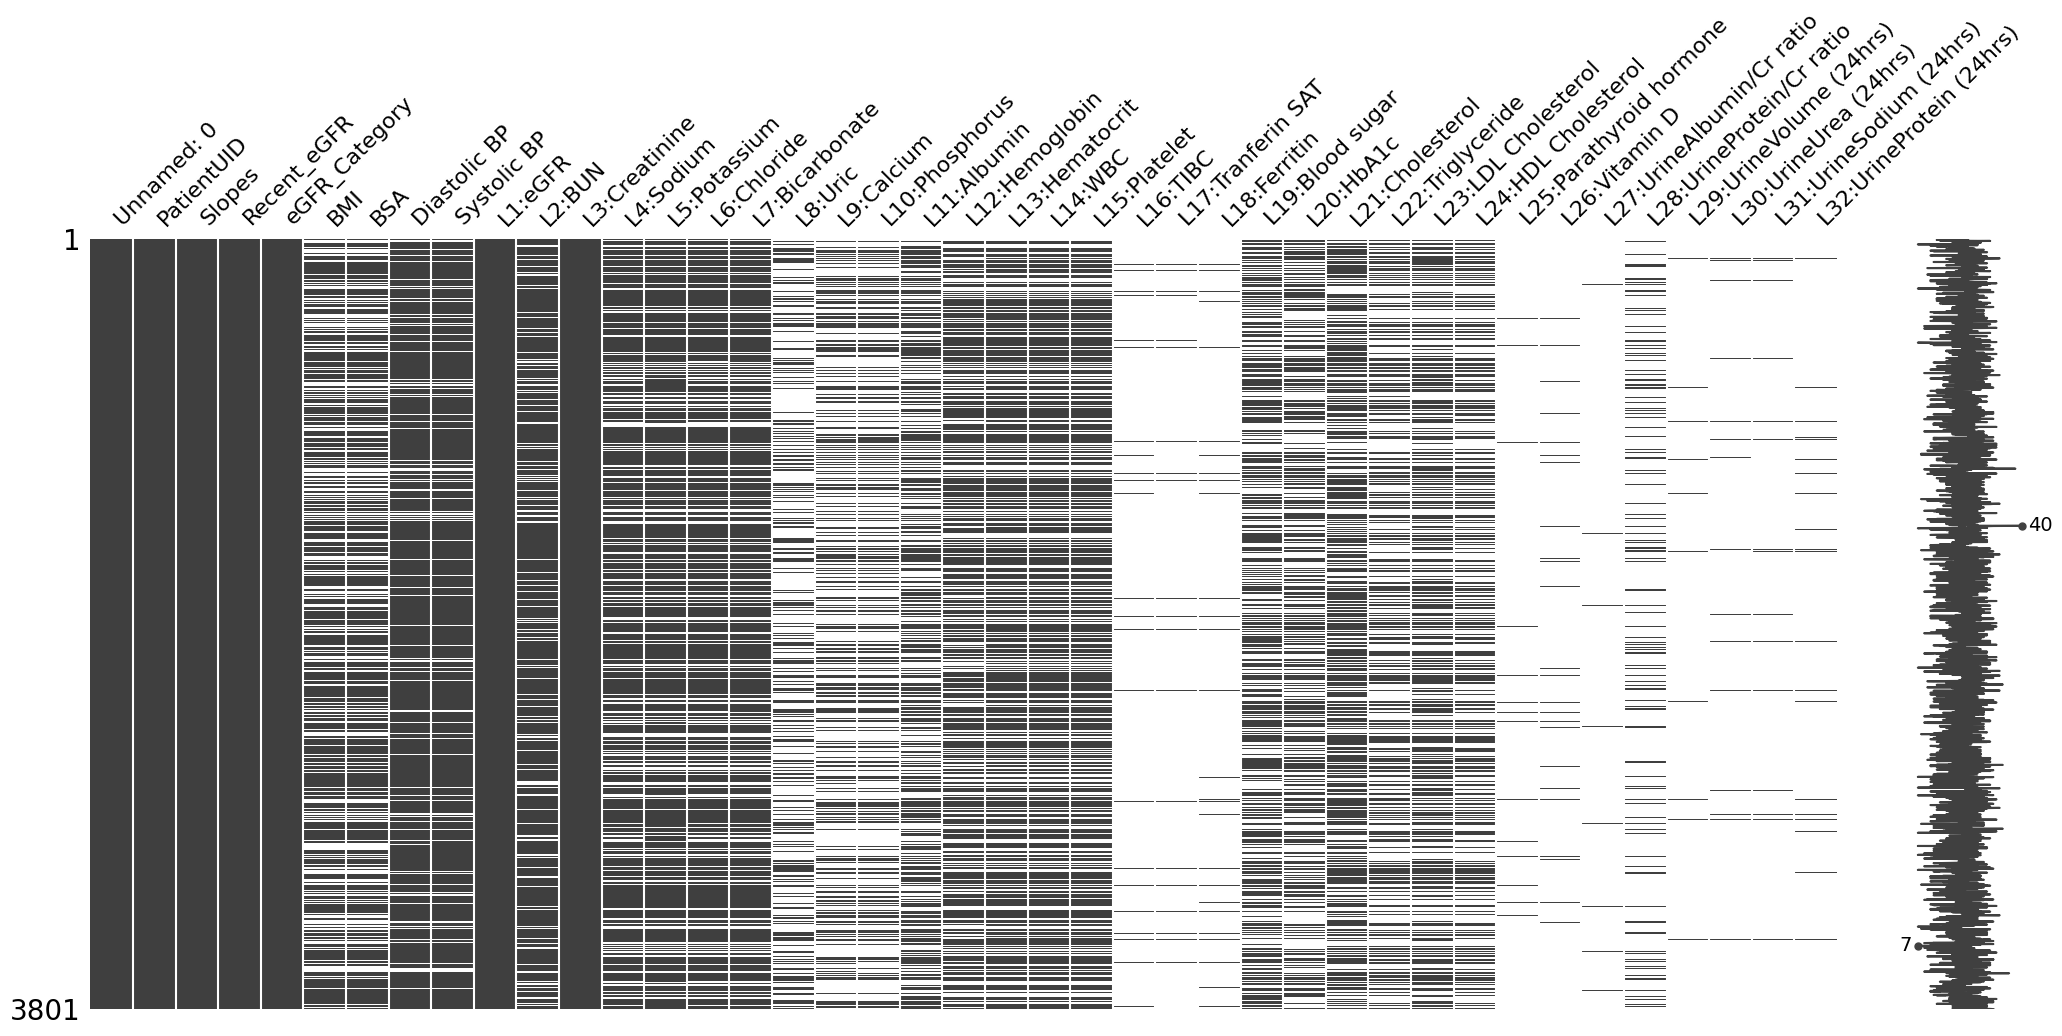

In [31]:
msno.matrix(stage4_sort)

<Axes: >

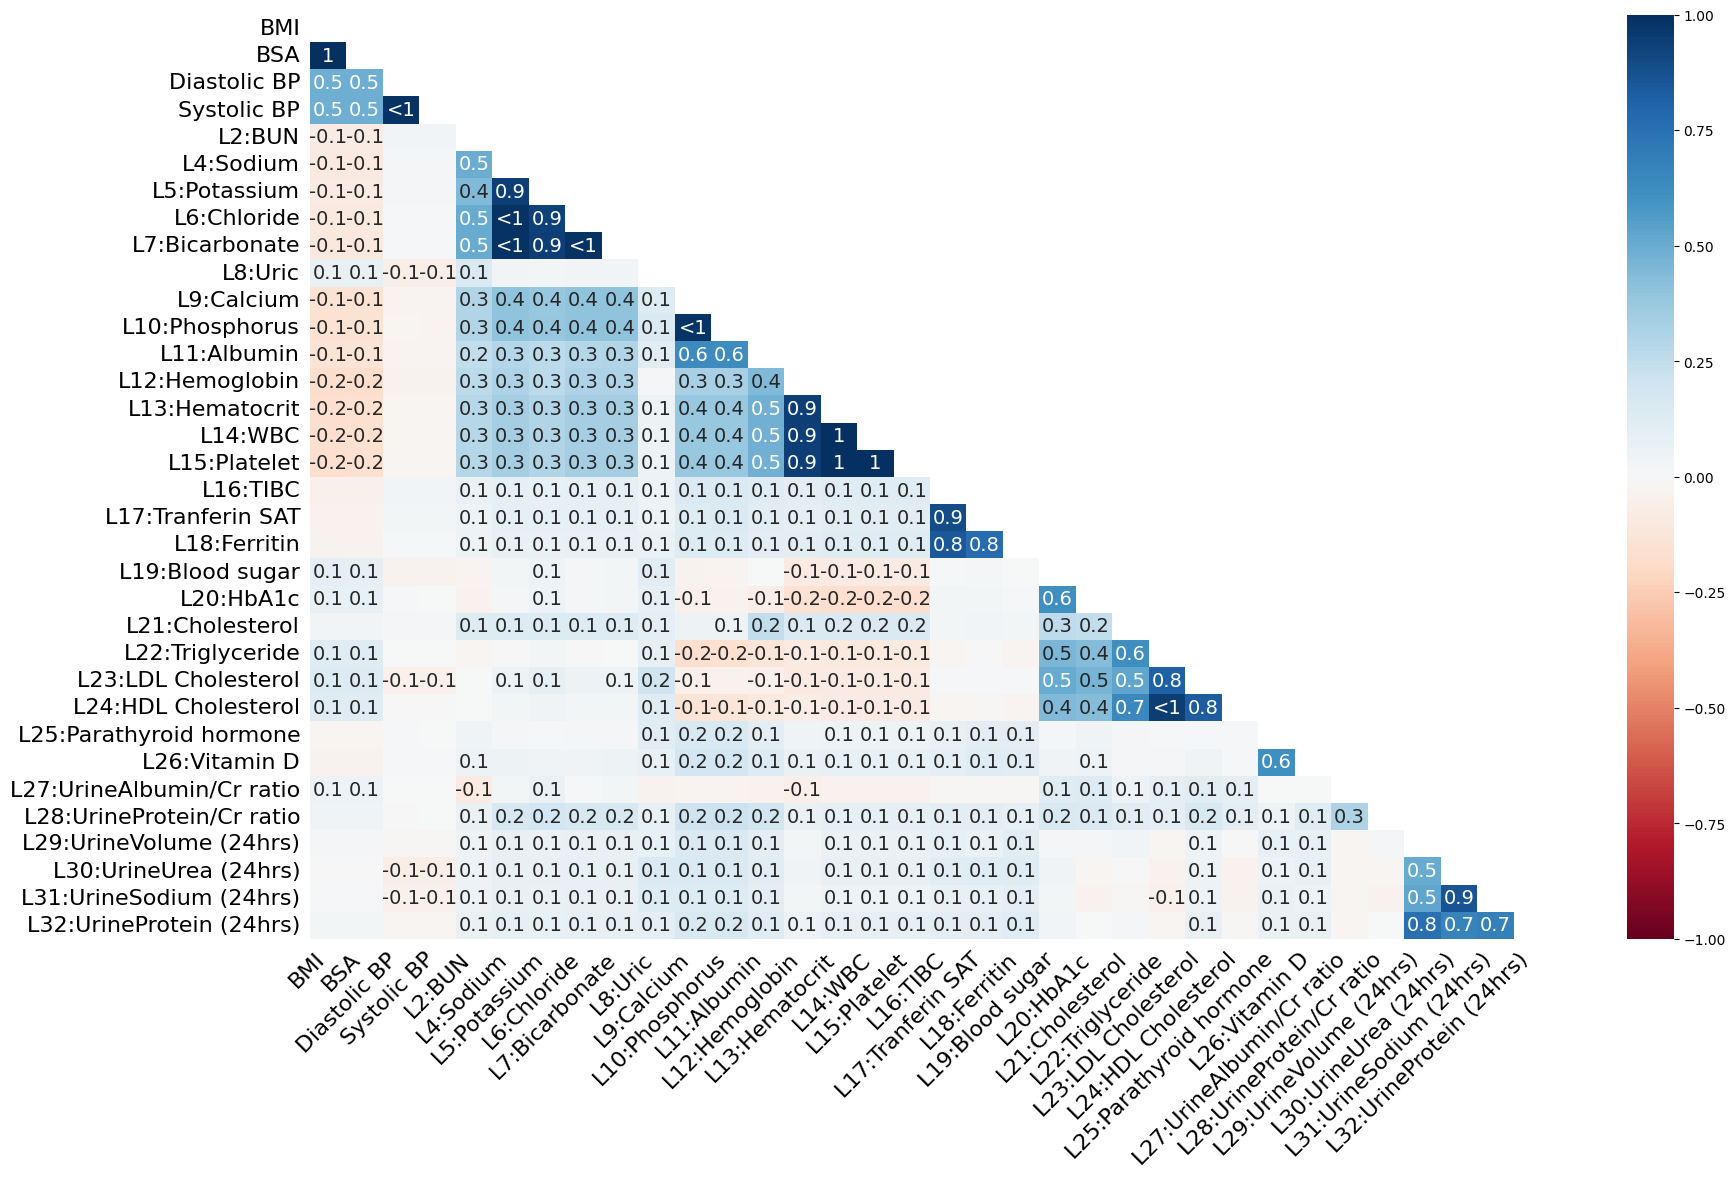

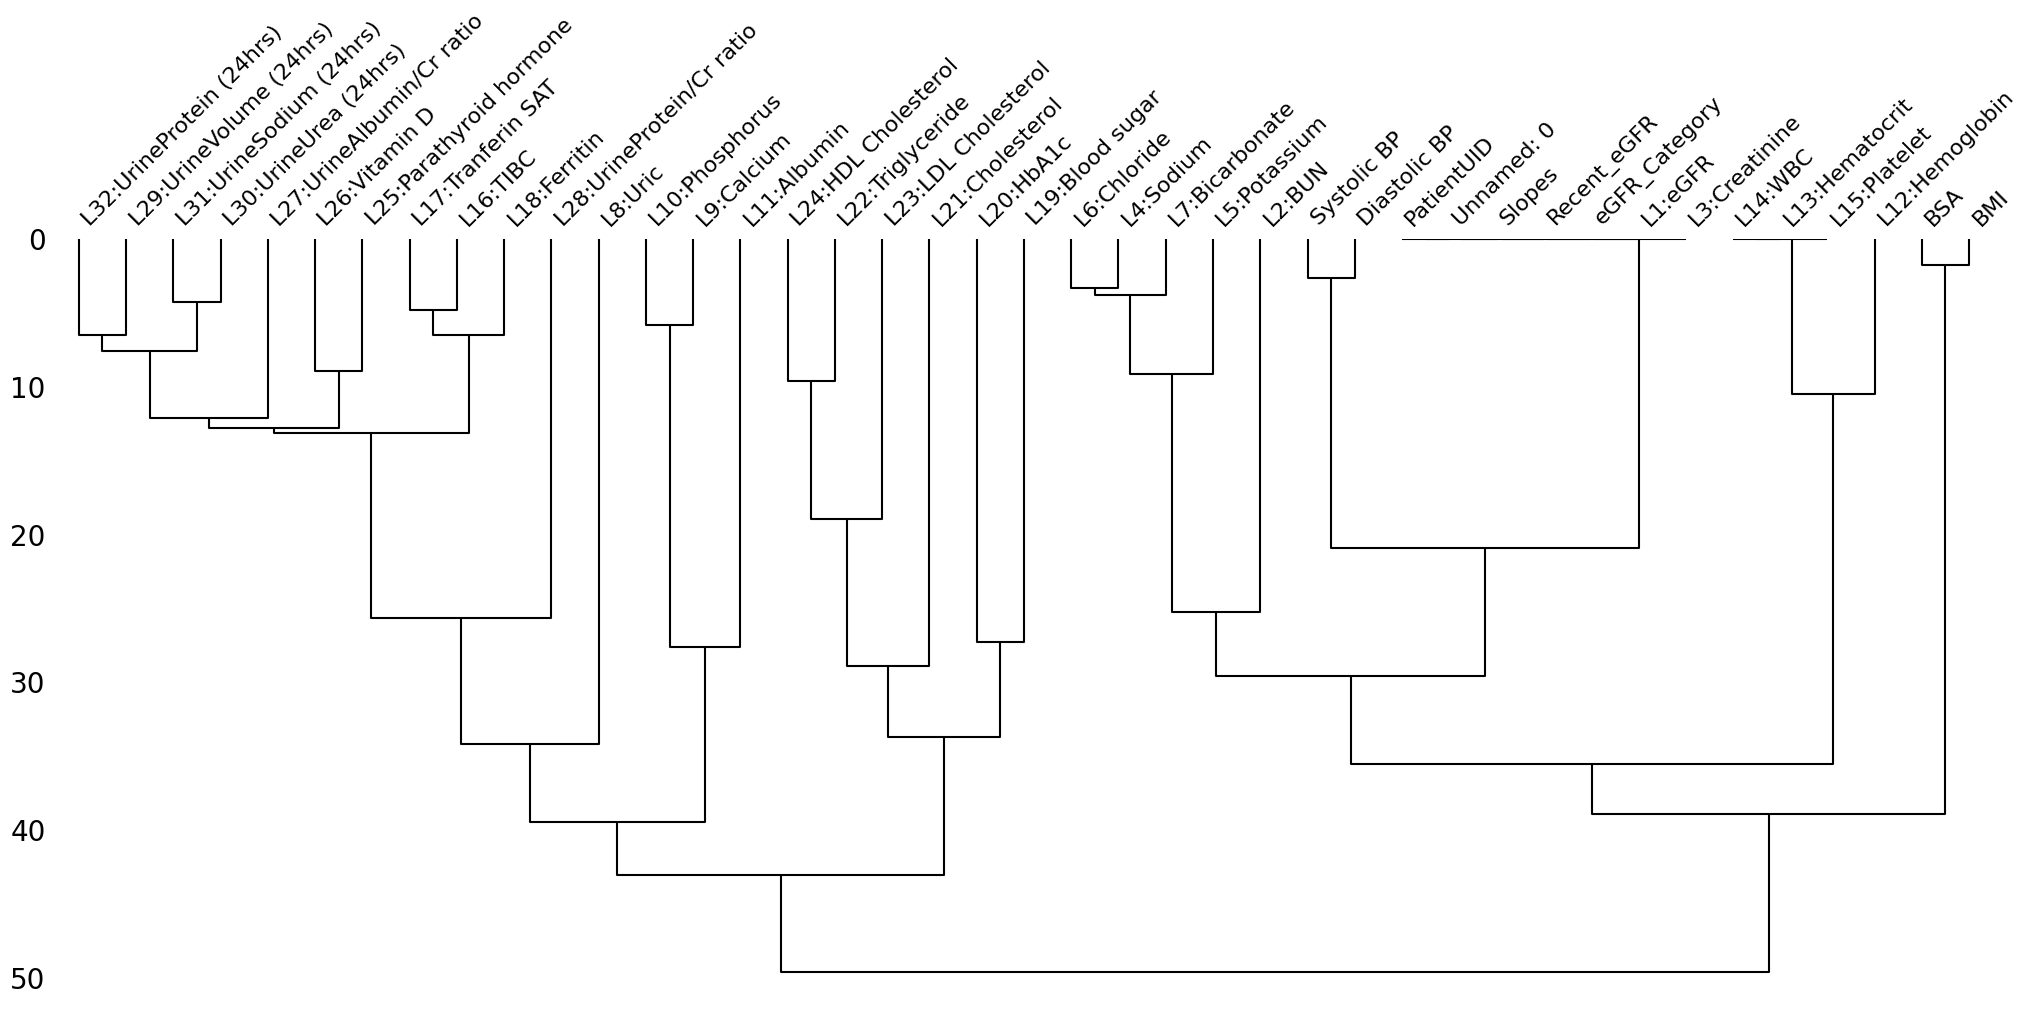

In [32]:
msno.heatmap(stage4_sort)
msno.dendrogram(stage4_sort)

##stage 5

In [33]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 5'
stage5 = data1[data1['eGFR_Category'] == 'ระยะที่ 5']
stage5

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
8               8     1944612  -9.500000        14.80     ระยะที่ 5    NaN   
21             21      845603 -32.967742         3.40     ระยะที่ 5    NaN   
34             34      424420   0.098649        12.30     ระยะที่ 5    NaN   
37             37      369589  -5.783117        12.50     ระยะที่ 5  27.06   
61             61     2305655  -6.355721        59.20     ระยะที่ 5  22.89   
...           ...         ...        ...          ...           ...    ...   
52572       52572      635962  -2.733480        59.11     ระยะที่ 5  26.19   
52573       52573      635962  -2.711051        59.11     ระยะที่ 5  26.99   
52574       52574      635962   1.263801        59.11     ระยะที่ 5  25.95   
52575       52575      635962   2.245466        59.11     ระยะที่ 5    NaN   
52576       52576      635962  -0.670764        59.11     ระยะที่ 5    NaN   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
8       NaN          68.0        111.0    54.20  ...                  NaN   
21      NaN          77.0        134.0    38.30  ...                176.0   
34      NaN          77.0        142.0    12.20  ...                  NaN   
37     1.64          70.0        129.0    18.60  ...                  NaN   
61     1.53          75.0        128.0    66.20  ...                  NaN   
...     ...           ...          ...      ...  ...                  ...   
52572  1.87          76.0        147.0    58.60  ...                204.0   
52573  1.89          91.0        144.0    55.20  ...                148.0   
52574  1.86          95.0        147.0    51.10  ...                101.0   
52575   NaN           NaN          NaN    52.53  ...                126.0   
52576   NaN           NaN          NaN    55.04  ...                191.0   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
8                      NaN                      NaN            NaN   
21                    37.0                      NaN            NaN   
34                     NaN                      NaN            NaN   
37                     NaN                      NaN            NaN   
61                     NaN                      NaN            NaN   
...                    ...                      ...            ...   
52572                 55.0                      NaN            NaN   
52573                 74.0                      NaN            NaN   
52574                 67.0                      NaN            NaN   
52575                 73.0                      NaN            NaN   
52576                 65.0                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
8                            NaN                        NaN   
21                           NaN                        NaN   
34                           NaN                        NaN   
37                           NaN                        NaN   
61                           NaN                        NaN   
...                          ...                        ...   
52572                        NaN                        NaN   
52573                        NaN                        NaN   
52574                        NaN                        NaN   
52575                        NaN                        NaN   
52576                        NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
8                          NaN                    NaN   
21                         NaN                    NaN   
34                         NaN                    NaN   
37                         NaN                    NaN   
61                         NaN                    NaN   
...                        ...                    ...   
52572                      NaN                    NaN   
52573                      NaN                    NaN   
52574                      NaN    

In [34]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage5_missing = stage5.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage5_missing / len(stage5)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing5 = pd.DataFrame({
    'Missing Values': stage5_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing5

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Slopes                                  0            0.000000
Recent_eGFR                             0            0.000000
eGFR_Category                           0            0.000000
BMI                                  1453           31.395851
BSA                                  1457           31.482282
Diastolic BP                          588           12.705272
Systolic BP                           584           12.618842
L1:eGFR                                 0            0.000000
L2:BUN                                823           17.783060
L3:Creatinine                           0            0.000000
L4:Sodium                            1404           30.337079
L5:Potassium                         1253           27.074330
L6:Chloride                          1412           30.509939
L7:Bicarbonate                       1394           30.121003
L8:Uric                              3330           71.953328
L9:Calcium                           2962           64.001729
L10:Phosphorus                       2974           64.261020
L11:Albumin                          2210           47.752809
L12:Hemoglobin                       1681           36.322385
L13:Hematocrit                       1560           33.707865
L14:WBC                              1562           33.751080
L15:Platelet                         1562           33.751080
L16:TIBC                             4442           95.980985
L17:Tranferin SAT                    4467           96.521175
L18:Ferritin                         4444           96.024201
L19:Blood sugar                      2111           45.613656
L20:HbA1c                            2509           54.213483
L21:Cholesterol                      1827           39.477096
L22:Triglyceride                     2606           56.309421
L23:LDL Cholesterol                  2260           48.833189
L24:HDL Cholesterol                  2596           56.093345
L25:Parathyroid hormone              4484           96.888505
L26:Vitamin D                        4457           96.305099
L27:UrineAlbumin/Cr ratio            4548           98.271392
L28:UrineProtein/Cr ratio            4030           87.078652
L29:UrineVolume (24hrs)              4571           98.768366
L30:UrineUrea (24hrs)                4533           97.947277
L31:UrineSodium (24hrs)              4559           98.509075
L32:UrineProtein (24hrs)             4559           98.509075

In [35]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage5_sort = stage5[stage5['eGFR_Category'] == 'ระยะที่ 5'].sort_values(by='Recent_eGFR', ascending=True)
stage5_sort

Unnamed: 0  PatientUID     Slopes  Recent_eGFR eGFR_Category    BMI  \
14356       14356      995791  -4.212297         1.05     ระยะที่ 5  30.86   
14355       14355      995791  -2.553202         1.05     ระยะที่ 5  29.02   
14354       14354      995791   0.197297         1.05     ระยะที่ 5  29.75   
14353       14353      995791  -0.494580         1.05     ระยะที่ 5  30.12   
14352       14352      995791  -4.615925         1.05     ระยะที่ 5  31.21   
...           ...         ...        ...          ...           ...    ...   
4032         4032      269896  -9.125000        89.94     ระยะที่ 5    NaN   
7524         7524     1398698   4.841253        89.97     ระยะที่ 5  22.10   
543           543       86006  22.496855        90.00     ระยะที่ 5    NaN   
2415         2415      410969  -7.625587        90.00     ระยะที่ 5  24.33   
2416         2416      410969   7.560714        90.00     ระยะที่ 5  24.91   

        BSA  Diastolic BP  Systolic BP  L1:eGFR  ...  L23:LDL Cholesterol  \
14356  1.82          66.0        177.0     7.36  ...                  NaN   
14355  1.86          61.0        178.0    10.20  ...                142.0   
14354  1.88          63.0        155.0    10.00  ...                  NaN   
14353  1.89          76.0        155.0    10.50  ...                151.0   
14352  1.94          76.0        147.0    15.90  ...                155.0   
...     ...           ...          ...      ...  ...                  ...   
4032    NaN           NaN          NaN    71.60  ...                  NaN   
7524   1.61          73.0        137.0    74.80  ...                  NaN   
543     NaN          80.0        160.0    58.70  ...                105.0   
2415   1.81          71.0        139.0    60.40  ...                132.0   
2416   1.83          72.0        150.0    51.50  ...                  NaN   

       L24:HDL Cholesterol  L25:Parathyroid hormone  L26:Vitamin D  \
14356                  NaN                      NaN            NaN   
14355                  NaN                      NaN            NaN   
14354                  NaN                      NaN            NaN   
14353                  NaN                      NaN            NaN   
14352                 39.0                      NaN            NaN   
...                    ...                      ...            ...   
4032                   NaN                      NaN            NaN   
7524                   NaN                      NaN            NaN   
543                   62.0                      NaN            NaN   
2415                  53.0                      NaN            NaN   
2416                   NaN                      NaN            NaN   

       L27:UrineAlbumin/Cr ratio  L28:UrineProtein/Cr ratio  \
14356                        NaN                        NaN   
14355                        NaN                        NaN   
14354                        NaN                        NaN   
14353                        NaN                        NaN   
14352                        NaN                        NaN   
...                          ...                        ...   
4032                         NaN                        NaN   
7524                         NaN                        NaN   
543                          NaN                        NaN   
2415                         NaN                        NaN   
2416                         NaN                        NaN   

       L29:UrineVolume (24hrs)  L30:UrineUrea (24hrs)  \
14356                      NaN                    NaN   
14355                      NaN                    NaN   
14354                      NaN                    NaN   
14353                      NaN                    NaN   
14352                      NaN                    NaN   
...                        ...                    ...   
4032                       NaN                    NaN   
7524                       NaN                    NaN   
543                        NaN    

<Axes: >

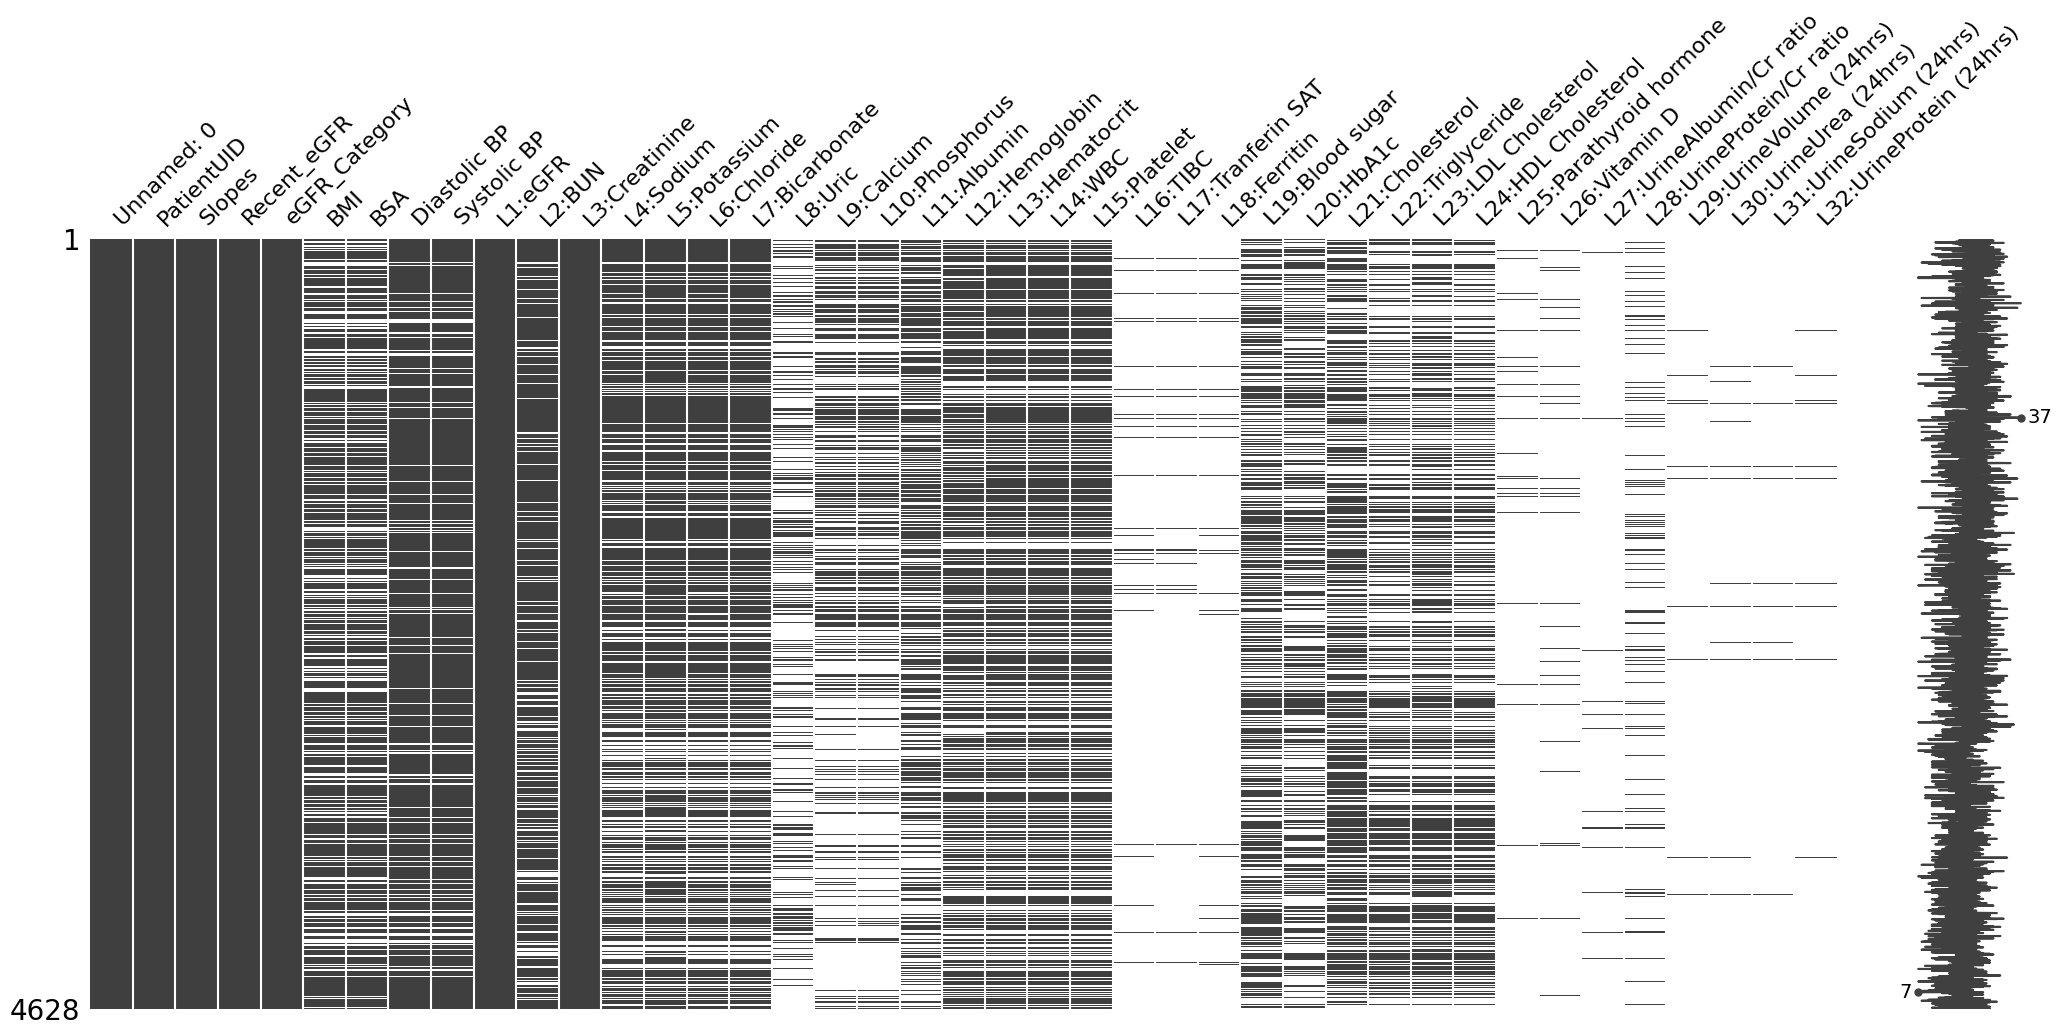

In [36]:
msno.matrix(stage5_sort)

<Axes: >

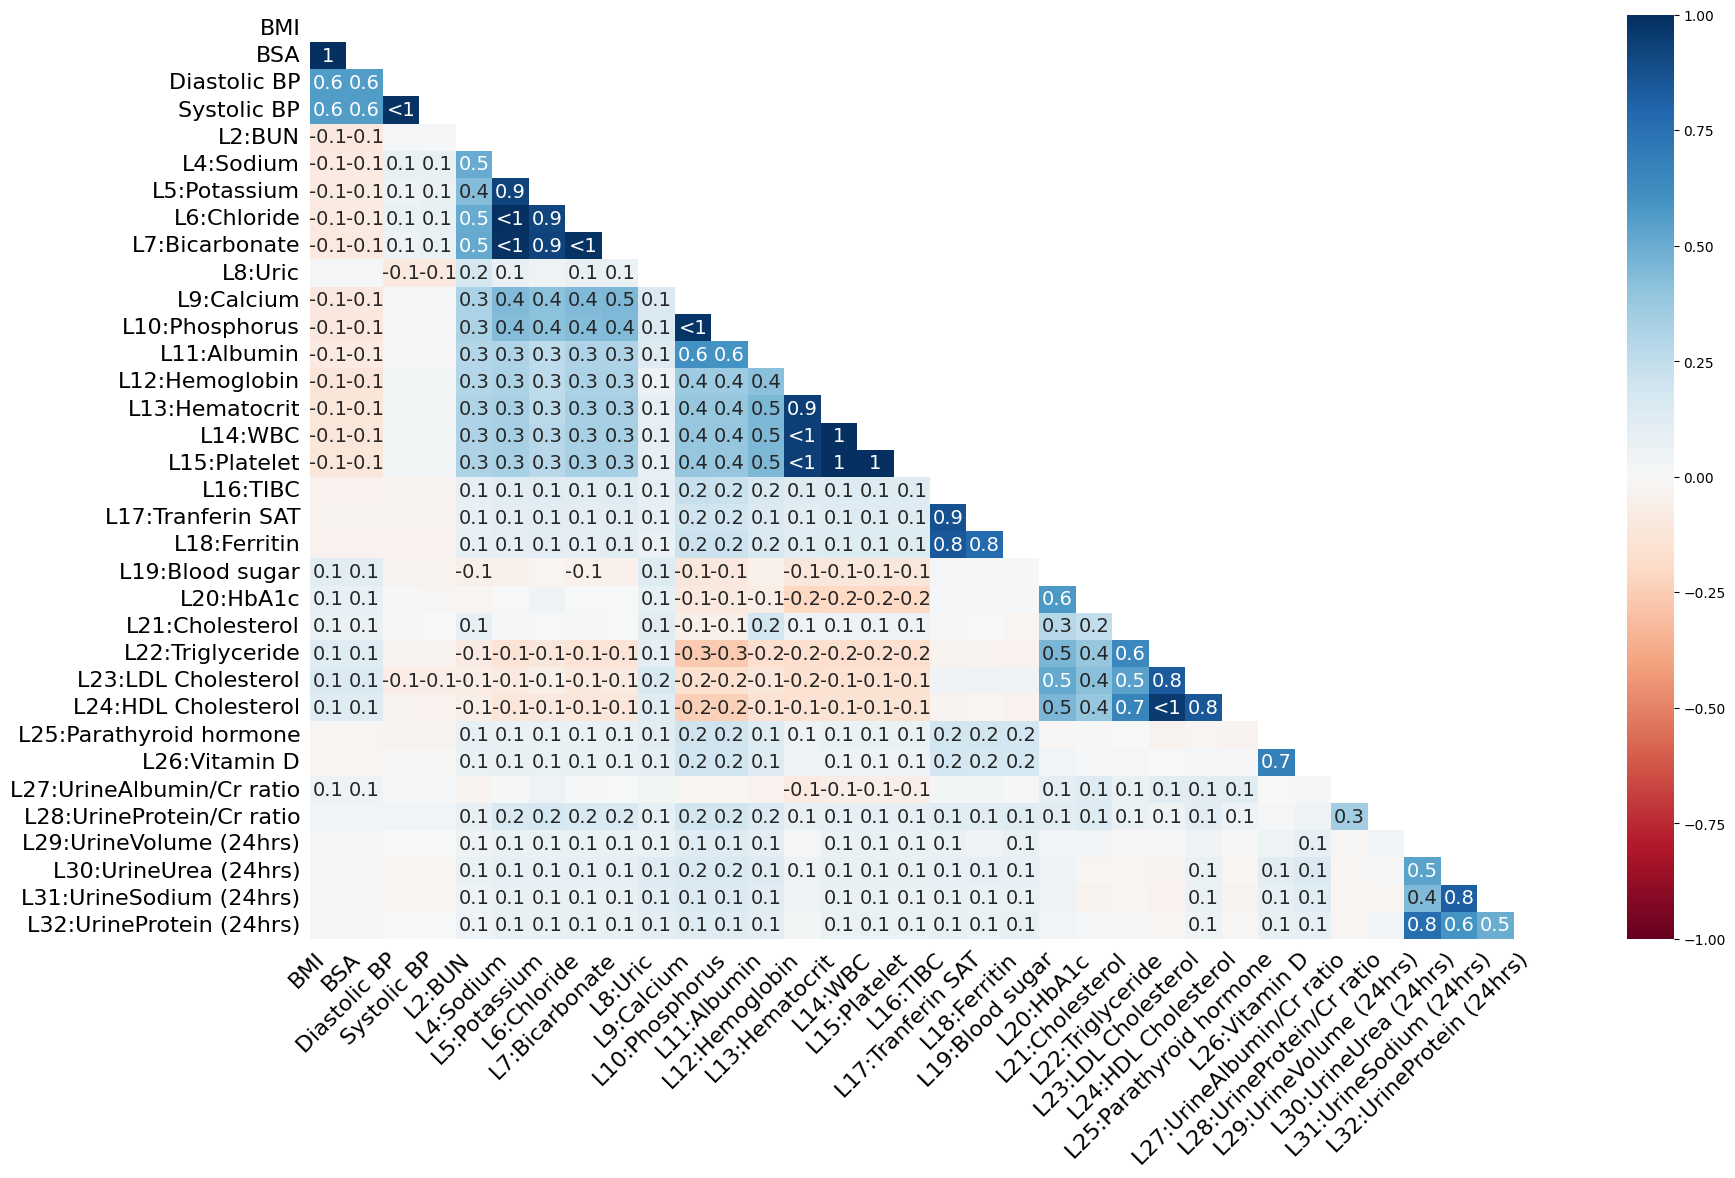

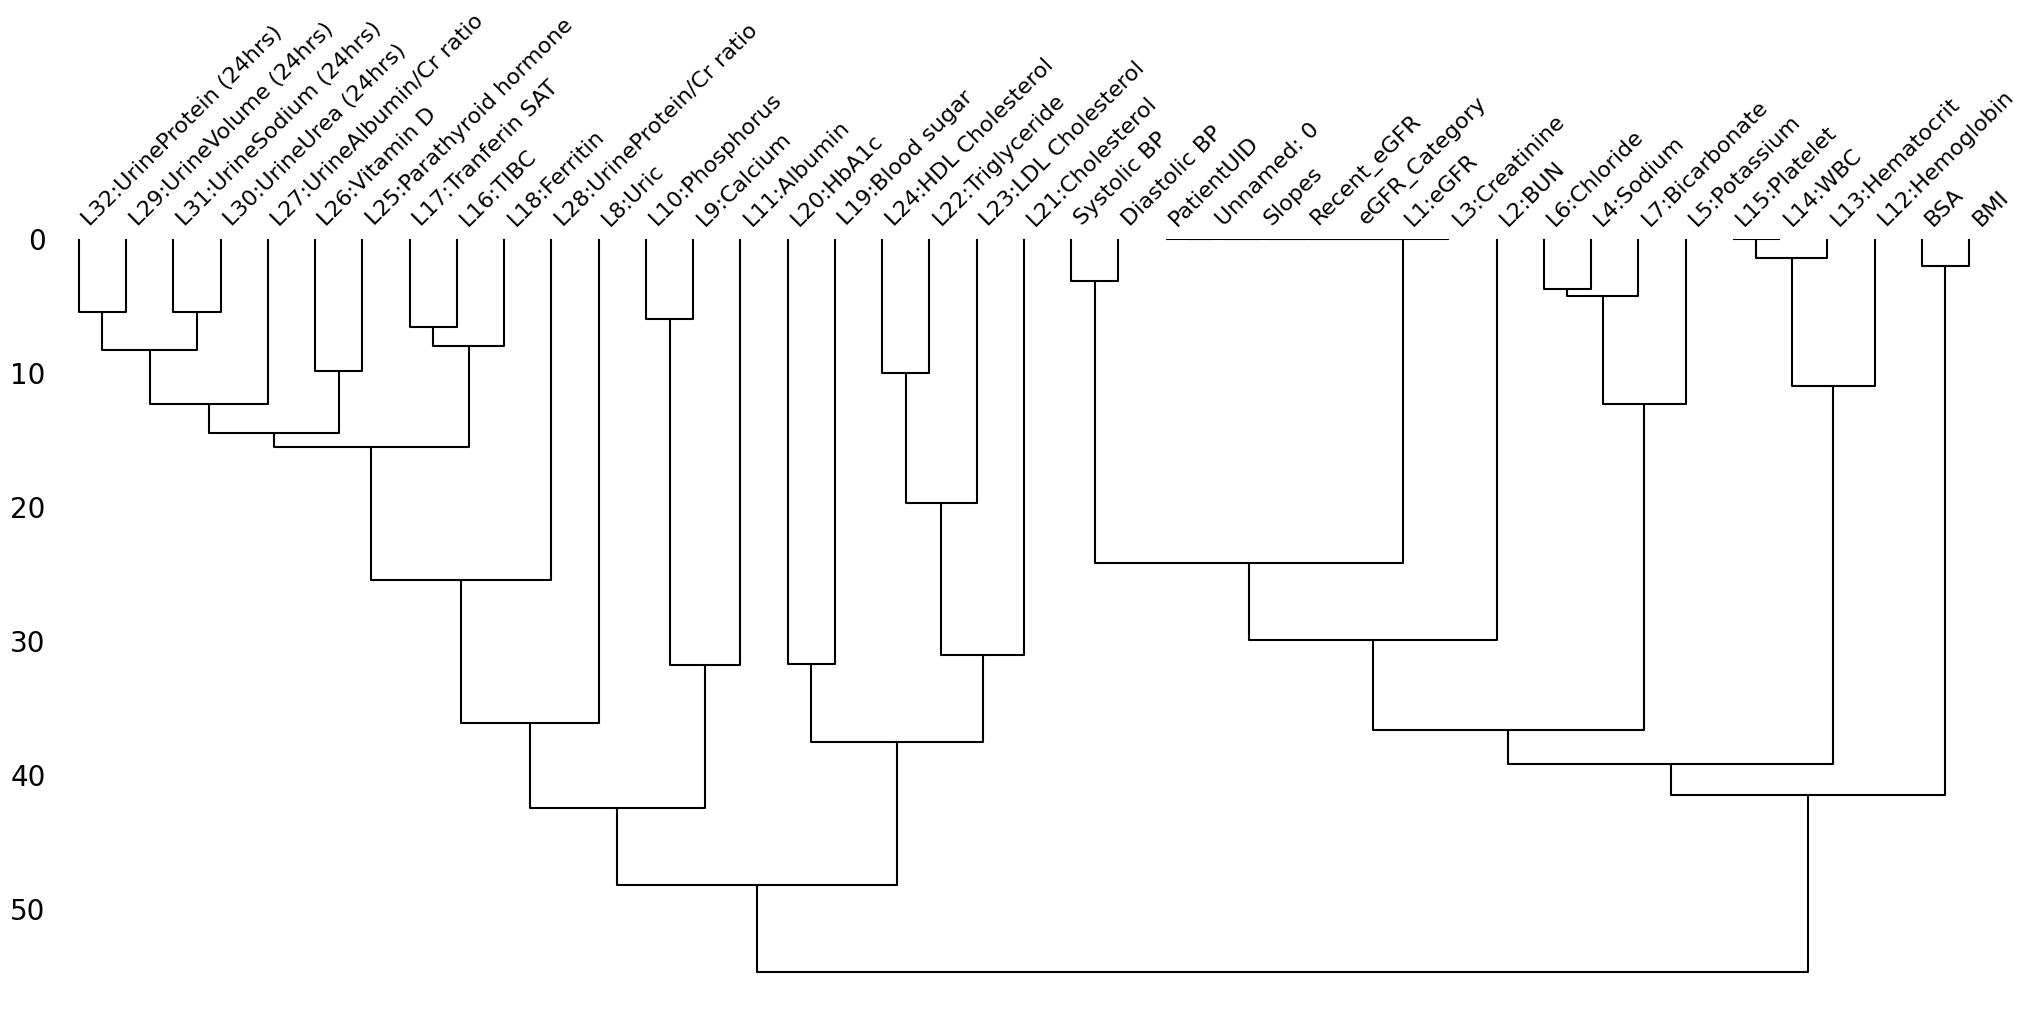

In [37]:
msno.heatmap(stage5_sort)
msno.dendrogram(stage5_sort)

#แบ่งตามค่า slope ที่ -0.5

In [38]:
df

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
0               0      924852        15.80   2.754717    NaN   NaN   
1               1      989278        32.30 -46.720000  18.71  1.70   
2               2     2103792        55.90  11.018868  23.56  1.47   
3               3      953611        51.10  17.222520  27.50  1.41   
4               4      488150        32.60 -79.002653    NaN   NaN   
...           ...         ...          ...        ...    ...   ...   
52615       52615       43763        55.28  -4.929870    NaN   NaN   
52616       52616       43763        55.28  16.017287  35.26  2.03   
52617       52617       43763        55.28 -24.861814    NaN   NaN   
52618       52618       43763        55.28   4.558175    NaN   NaN   
52619       52619       43763        55.28   2.708378  32.77  2.02   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
0              53.0        131.0    13.00     NaN  ...                  NaN   
1              71.0        121.0    80.30     5.2  ...                  NaN   
2              93.0        143.0    44.70    22.6  ...                  NaN   
3              60.0        120.0    33.50    28.9  ...                 30.0   
4               NaN          NaN   114.20     NaN  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
52615           NaN          NaN    73.30    25.0  ...                 37.0   
52616          66.0        147.0    68.10    24.8  ...                 41.0   
52617           NaN          NaN    84.60    17.8  ...                 40.0   
52618           NaN          NaN    56.06    23.8  ...                 39.0   
52619          80.0        124.0    61.33     NaN  ...                 41.0   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
0                          NaN            NaN                        NaN   
1                          NaN            NaN                        NaN   
2                          NaN            NaN                        NaN   
3                          NaN            NaN                        NaN   
4                          NaN            NaN                        NaN   
...                        ...            ...                        ...   
52615                      NaN            NaN                        NaN   
52616                      NaN            NaN                        NaN   
52617                      NaN            NaN                        NaN   
52618                      NaN            NaN                        NaN   
52619                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                           17.0                      NaN   
...                          ...                      ...   
52615                        NaN                      NaN   
52616                        NaN                      NaN   
52617                        NaN                      NaN   
52618                        NaN                      NaN   
52619                        NaN                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                        NaN                      NaN   
1                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
4                        NaN                      NaN   
...                      ...                      ...   
52615                    NaN                      NaN   
52616                    NaN                      NaN   
52617                    NaN                      NaN   
5

In [39]:
# คอลัมน์ 'Slopes' มีค่ามากว่า -0.5 และต่ำกว่า -0.5
# กรองข้อมูลที่ 'Slopes' มีค่ามากว่า -0.5
slope1 = df[df['Slopes'] > -0.5]
# กรองข้อมูลที่ 'Slopes' มีค่าต่ำกว่าหรือเท่ากับ -0.5
slope2 = df[df['Slopes'] <= -0.5]


## slope ที่มีค่ามากว่า -0.5

In [40]:
slope1 #ข้อมูลที่ 'Slopes' มีค่ามากว่า -0.5
# slope  ที่มีค่ามากกว่า -0.5 มี 22,247 rows

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
0               0      924852        15.80   2.754717    NaN   NaN   
2               2     2103792        55.90  11.018868  23.56  1.47   
3               3      953611        51.10  17.222520  27.50  1.41   
5               5     2155195        54.10   7.551724  24.80  1.50   
7               7      854989        76.10  44.179221  29.20  1.75   
...           ...         ...          ...        ...    ...   ...   
52607       52607     2180110        72.45   6.725197    NaN   NaN   
52612       52612     2738720        52.87   4.868052  30.22  1.63   
52616       52616       43763        55.28  16.017287  35.26  2.03   
52618       52618       43763        55.28   4.558175    NaN   NaN   
52619       52619       43763        55.28   2.708378  32.77  2.02   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
0              53.0        131.0    13.00     NaN  ...                  NaN   
2              93.0        143.0    44.70    22.6  ...                  NaN   
3              60.0        120.0    33.50    28.9  ...                 30.0   
5              87.0        133.0    46.30     NaN  ...                  NaN   
7              77.0        148.0    29.50    35.8  ...                 70.0   
...             ...          ...      ...     ...  ...                  ...   
52607           NaN          NaN   118.50     NaN  ...                  NaN   
52612          83.0        146.0    66.00    15.9  ...                  NaN   
52616          66.0        147.0    68.10    24.8  ...                 41.0   
52618           NaN          NaN    56.06    23.8  ...                 39.0   
52619          80.0        124.0    61.33     NaN  ...                 41.0   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
0                          NaN            NaN                        NaN   
2                          NaN            NaN                        NaN   
3                          NaN            NaN                        NaN   
5                          NaN            NaN                        NaN   
7                          NaN            NaN                        NaN   
...                        ...            ...                        ...   
52607                      NaN            NaN                        NaN   
52612                      NaN            NaN                        NaN   
52616                      NaN            NaN                        NaN   
52618                      NaN            NaN                        NaN   
52619                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
0                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
5                            NaN                      NaN   
7                            NaN                      NaN   
...                          ...                      ...   
52607                       23.0                      NaN   
52612                        NaN                      NaN   
52616                        NaN                      NaN   
52618                        NaN                      NaN   
52619                        NaN                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
0                        NaN                      NaN   
2                        NaN                      NaN   
3                        NaN                      NaN   
5                        NaN                      NaN   
7                        NaN                      NaN   
...                      ...                      ...   
52607                    NaN                      NaN   
52612                    NaN                      NaN   
52616                    NaN                      NaN   
5

In [41]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope1_missing = slope1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope1_missing / len(slope1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
slope1_missing_count = pd.DataFrame({
    'Missing Values': slope1_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
slope1_missing_count

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Recent_eGFR                             0            0.000000
Slopes                                  0            0.000000
BMI                                  6542           29.406212
BSA                                  6545           29.419697
Diastolic BP                         3001           13.489459
Systolic BP                          2980           13.395065
L1:eGFR                                 1            0.004495
L2:BUN                               5361           24.097631
L3:Creatinine                           1            0.004495
L4:Sodium                            8893           39.973929
L5:Potassium                         7982           35.878995
L6:Chloride                          8928           40.131254
L7:Bicarbonate                       8849           39.776150
L8:Uric                             16360           73.538005
L9:Calcium                          16968           76.270958
L10:Phosphorus                      17125           76.976671
L11:Albumin                         12511           56.236796
L12:Hemoglobin                      10135           45.556704
L13:Hematocrit                       9523           42.805772
L14:WBC                              9524           42.810267
L15:Platelet                         9524           42.810267
L16:TIBC                            21846           98.197510
L17:Tranferin SAT                   21893           98.408774
L18:Ferritin                        21838           98.161550
L19:Blood sugar                     10022           45.048771
L20:HbA1c                           12057           54.196071
L21:Cholesterol                      7971           35.829550
L22:Triglyceride                    11095           49.871893
L23:LDL Cholesterol                  9895           44.477907
L24:HDL Cholesterol                 11244           50.541646
L25:Parathyroid hormone             21855           98.237965
L26:Vitamin D                       21676           97.433362
L27:UrineAlbumin/Cr ratio           21695           97.518767
L28:UrineProtein/Cr ratio           19938           89.621073
L29:UrineVolume (24hrs)             22092           99.303277
L30:UrineUrea (24hrs)               22086           99.276307
L31:UrineSodium (24hrs)             22138           99.510046
L32:UrineProtein (24hrs)            22003           98.903223
eGFR_Category                           0            0.000000

In [42]:
# เรียงลำดับข้อมูลตาม 'Slopes' จากน้อยไปมาก
slope1_sort = slope1.sort_values(by='Slopes')
slope1_sort

Unnamed: 0  PatientUID  Recent_eGFR      Slopes    BMI   BSA  \
5294         5294     1587681        60.43   -0.499292  28.13  1.75   
12883       12883     1522563        46.88   -0.499145  22.49  1.75   
42464       42464      806119        67.23   -0.498634  27.51  1.81   
49203       49203      842340        62.14   -0.497727  23.67  1.74   
11943       11943     2652570        48.33   -0.497727  31.64  1.79   
...           ...         ...          ...         ...    ...   ...   
26425       26425     2639105        93.50   79.001678    NaN   NaN   
5317         5317     2384626       125.93   79.441176    NaN   NaN   
7654         7654     2033631         8.66   90.231395    NaN   NaN   
38481       38481     2609014       110.36   95.217391  32.99  2.01   
47329       47329     1291292        58.38  106.892857  20.00  1.37   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
5294           84.0        170.0    78.80    14.1  ...                  NaN   
12883          61.0        100.0    45.77     NaN  ...                 66.0   
42464          64.0        124.0    69.60    14.6  ...                 63.0   
49203          59.0        137.0    74.90    14.7  ...                 43.0   
11943          74.0        128.0    75.80     8.4  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
26425          62.0         98.0    83.91    18.3  ...                  NaN   
5317           86.0        152.0    42.50    42.7  ...                  NaN   
7654           76.0        139.0    48.81    21.2  ...                  NaN   
38481          86.0        148.0    12.50    51.0  ...                  NaN   
47329           NaN        170.0     4.70    63.3  ...                  NaN   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
5294                       NaN            NaN                        NaN   
12883                      NaN            NaN                        NaN   
42464                      NaN            NaN                        NaN   
49203                      NaN            NaN                        NaN   
11943                      NaN            NaN                        NaN   
...                        ...            ...                        ...   
26425                      NaN            NaN                        NaN   
5317                       NaN            NaN                        NaN   
7654                       NaN            NaN                        NaN   
38481                      NaN            NaN                        NaN   
47329                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
5294                         NaN                      NaN   
12883                        NaN                      NaN   
42464                        NaN                      NaN   
49203                        NaN                      NaN   
11943                        NaN                      NaN   
...                          ...                      ...   
26425                        NaN                      NaN   
5317                        87.0                      NaN   
7654                         8.5                      NaN   
38481                        NaN                    320.0   
47329                        NaN                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
5294                     NaN                      NaN   
12883                    NaN                      NaN   
42464                    NaN                      NaN   
49203                    NaN                      NaN   
11943                    NaN                      NaN   
...                      ...                      ...   
26425                    NaN                      NaN   
5317                     NaN                      NaN   
7654                     NaN                  

<Axes: >

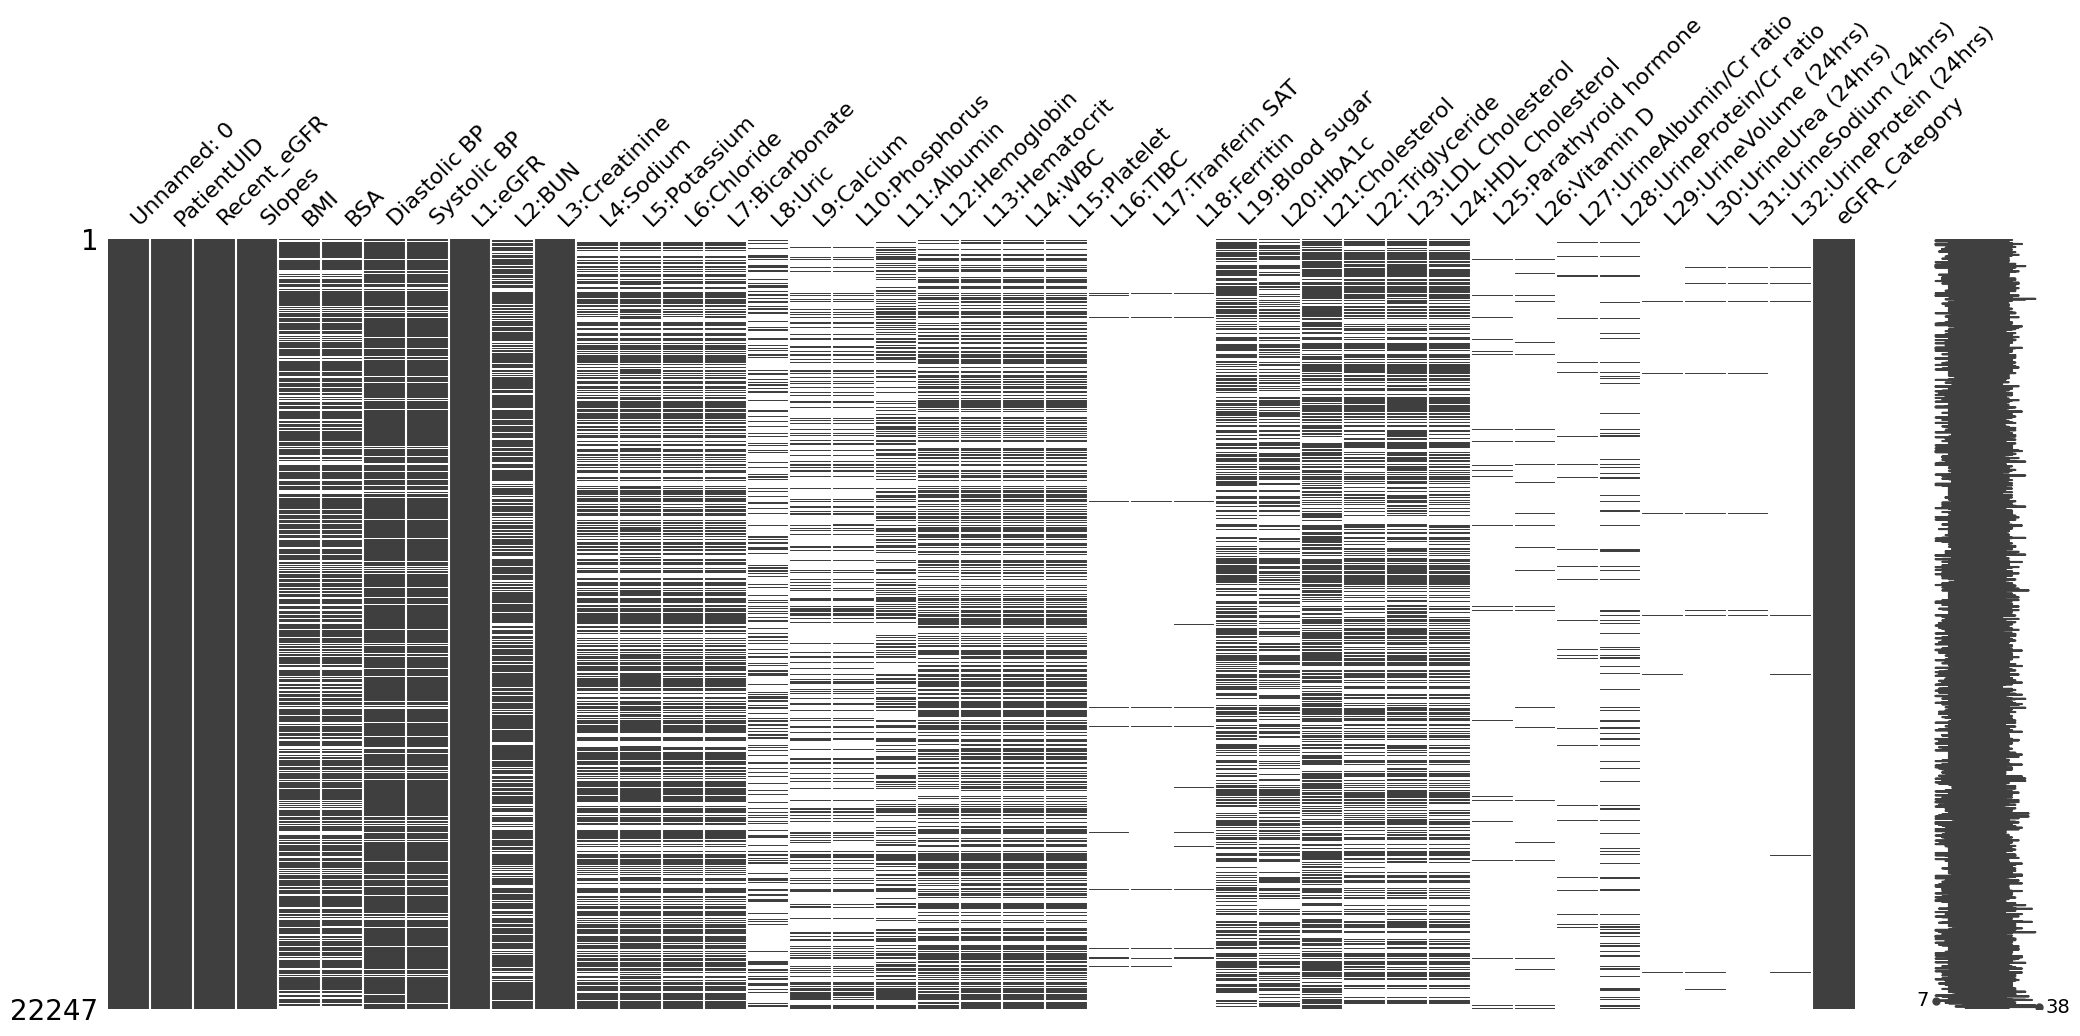

In [43]:
msno.matrix(slope1_sort)

<Axes: >

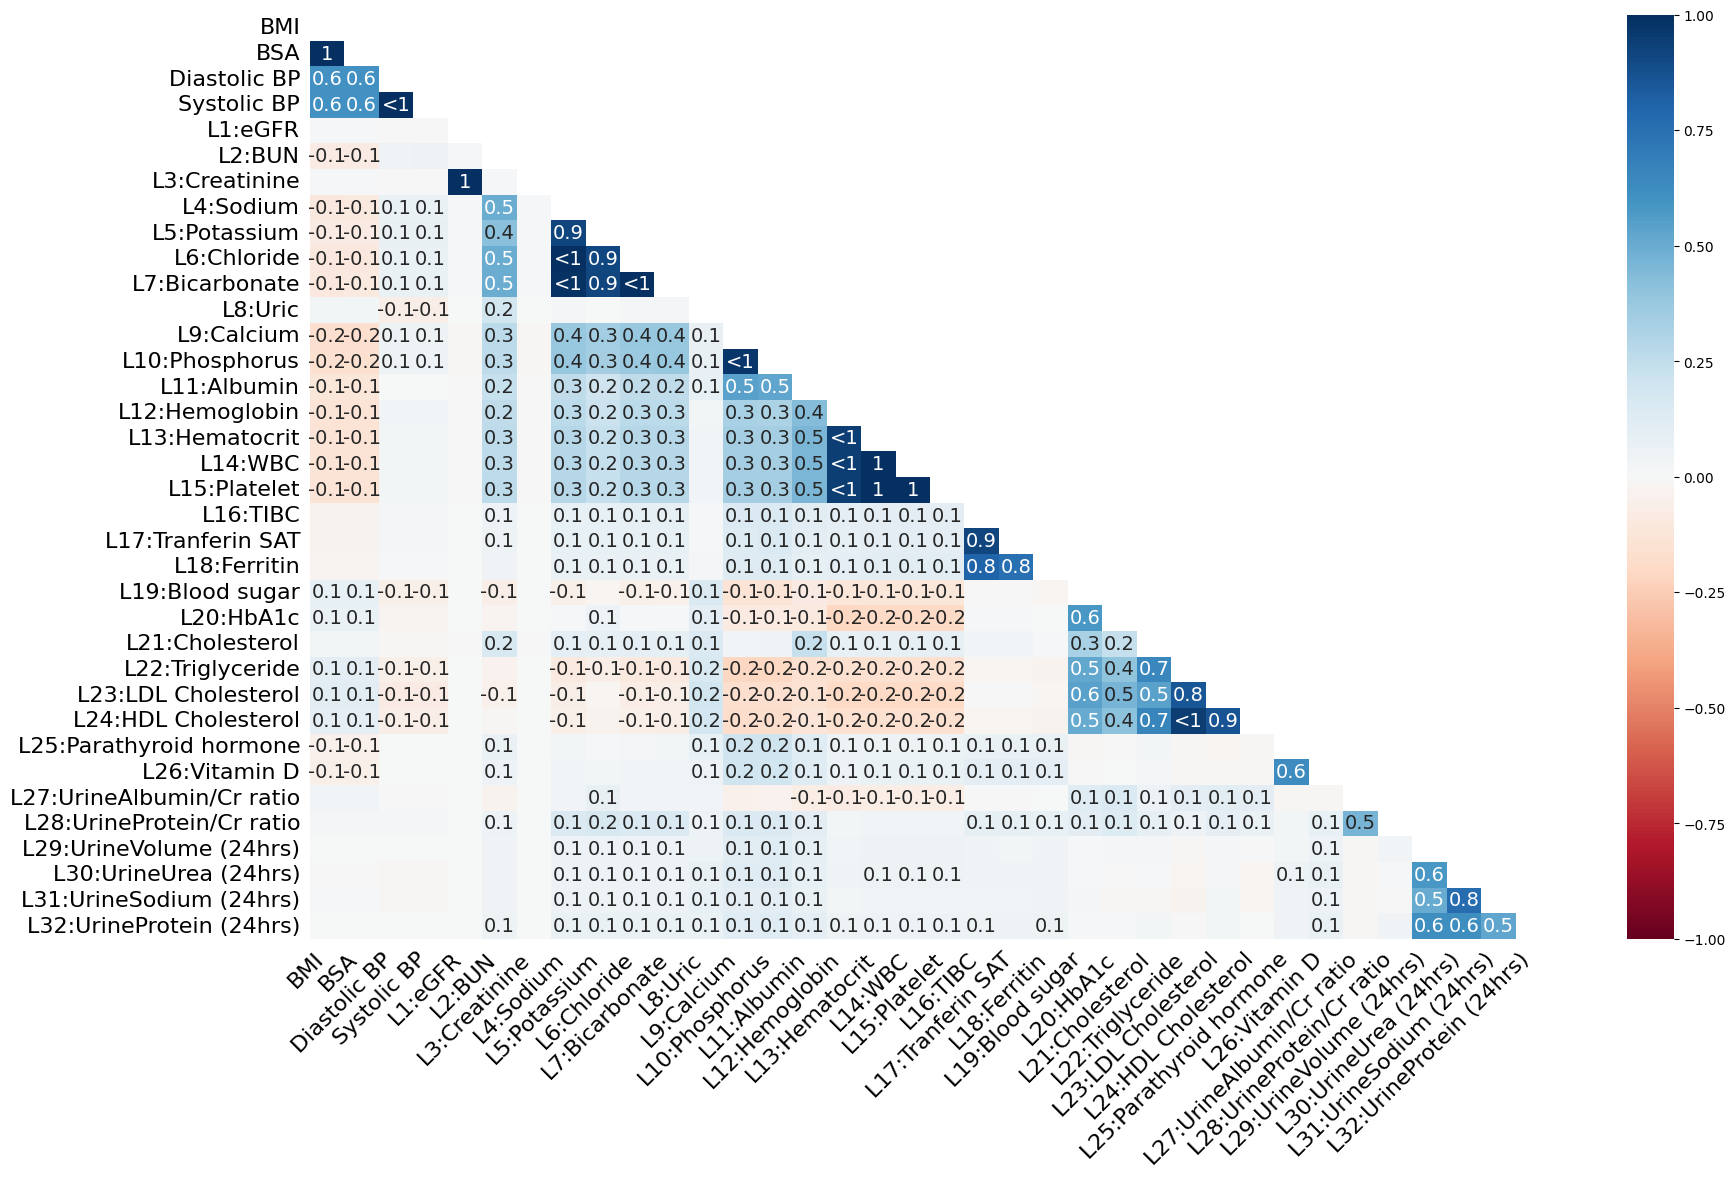

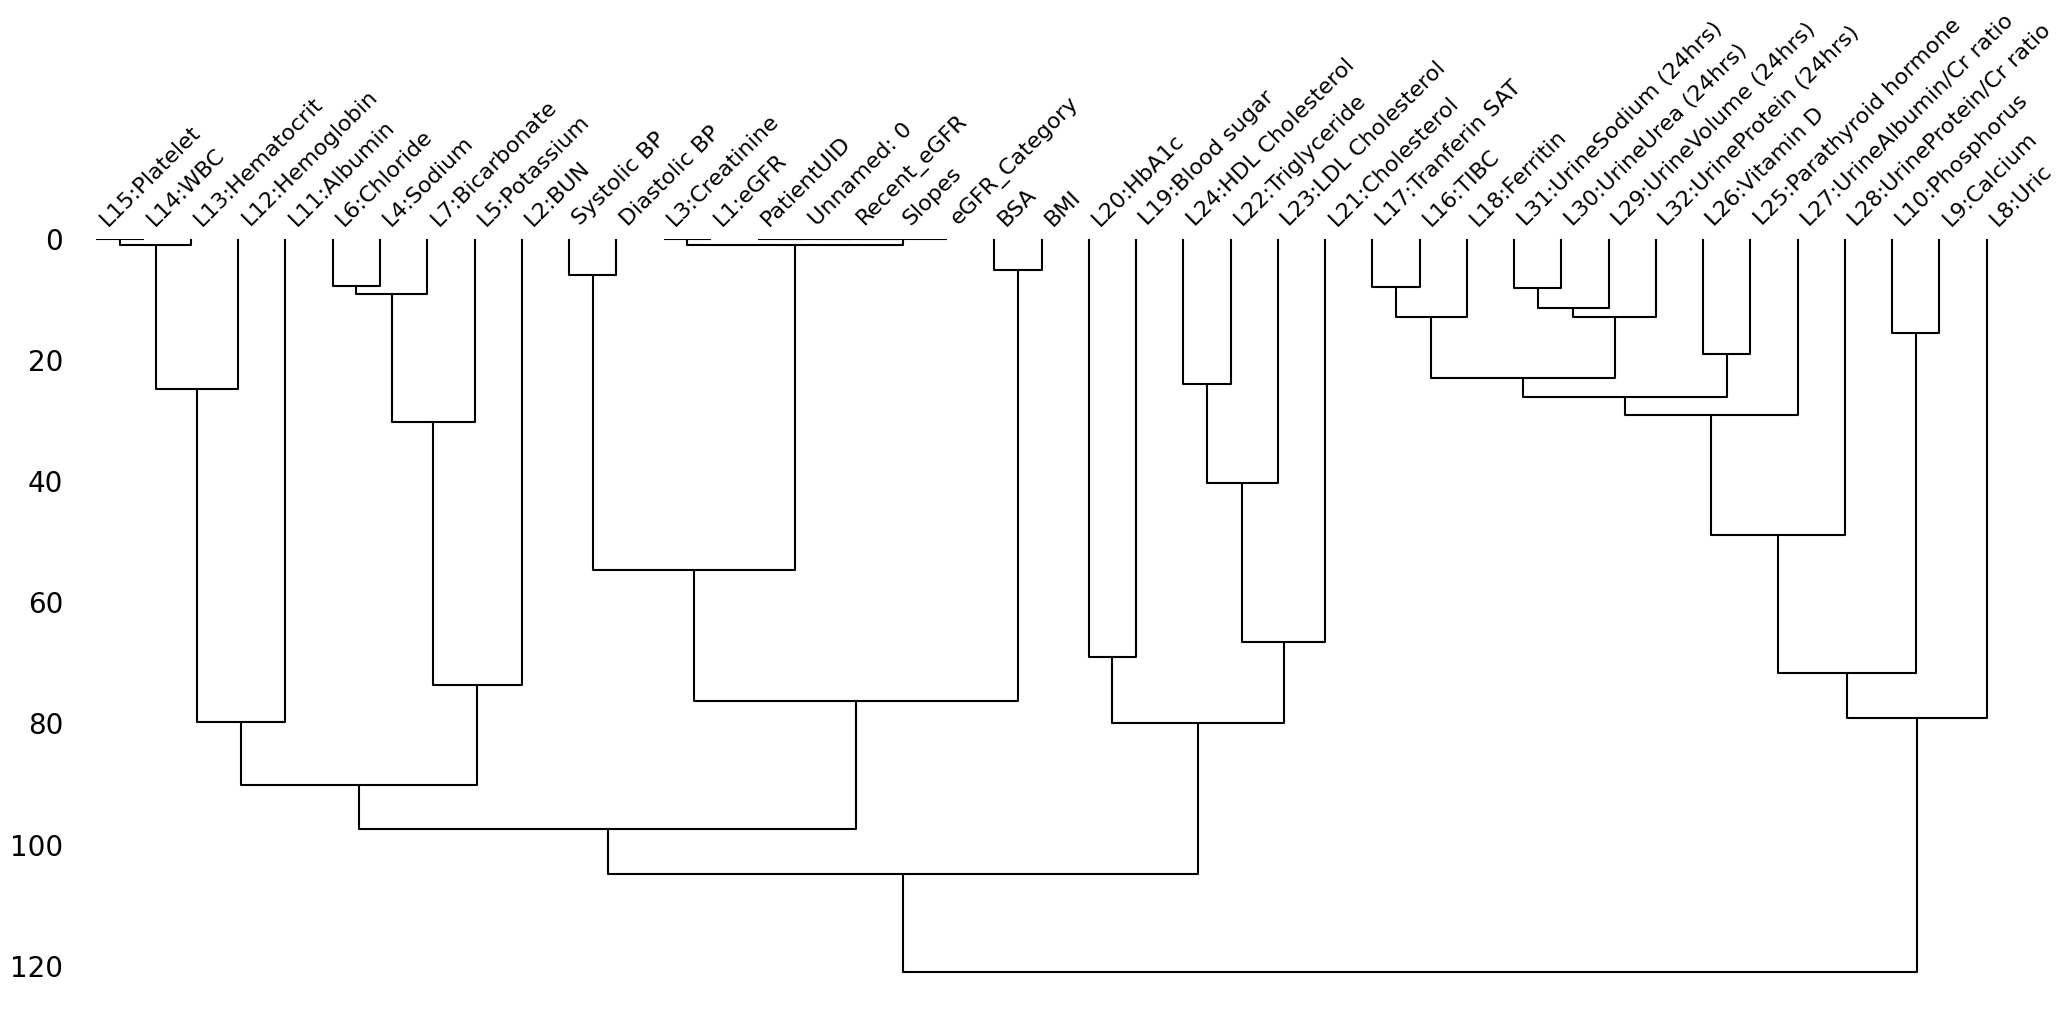

In [44]:
msno.heatmap(slope1_sort)
msno.dendrogram(slope1_sort)

##slope ต่ำกว่าหรือเท่ากับ -0.5

In [45]:
slope2 #ข้อมูลที่ 'Slopes' มีค่าต่ำกว่าหรือเท่ากับ
## slope  ที่มีต่ำกว่าหรือเท่ากับ -0.5 มี 30,373 rows

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
1               1      989278        32.30 -46.720000  18.71  1.70   
4               4      488150        32.60 -79.002653    NaN   NaN   
6               6     1349257        39.10  -0.590296  27.42  1.73   
8               8     1944612        14.80  -9.500000    NaN   NaN   
10             10     1634987        55.90 -13.117188  25.39  1.68   
...           ...         ...          ...        ...    ...   ...   
52611       52611     3170846        23.97  -1.866582    NaN   NaN   
52613       52613     2738720        52.87 -14.933888  28.00  1.58   
52614       52614       43763        55.28  -9.146778    NaN   NaN   
52615       52615       43763        55.28  -4.929870    NaN   NaN   
52617       52617       43763        55.28 -24.861814    NaN   NaN   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
1              71.0        121.0    80.30     5.2  ...                  NaN   
4               NaN          NaN   114.20     NaN  ...                  NaN   
6              70.0        143.0    39.70    21.2  ...                  NaN   
8              68.0        111.0    54.20    29.2  ...                  NaN   
10             61.0        119.0    69.70    10.3  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
52611          84.0        148.0    20.90    35.1  ...                  NaN   
52613          83.0        118.0    77.71    10.9  ...                 38.0   
52614          78.0        137.0    83.80    15.3  ...                 39.0   
52615           NaN          NaN    73.30    25.0  ...                 37.0   
52617           NaN          NaN    84.60    17.8  ...                 40.0   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
1                          NaN            NaN                        NaN   
4                          NaN            NaN                        NaN   
6                          NaN            NaN                        NaN   
8                          NaN            NaN                        NaN   
10                         NaN            NaN                        NaN   
...                        ...            ...                        ...   
52611                      NaN            NaN                        NaN   
52613                      NaN            NaN                        NaN   
52614                      NaN            NaN                        NaN   
52615                      NaN            NaN                        NaN   
52617                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
1                            NaN                      NaN   
4                           17.0                      NaN   
6                            NaN                      NaN   
8                            NaN                      NaN   
10                           NaN                      NaN   
...                          ...                      ...   
52611                        NaN                      NaN   
52613                        NaN                      NaN   
52614                        NaN                      NaN   
52615                        NaN                      NaN   
52617                        NaN                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
1                        NaN                      NaN   
4                        NaN                      NaN   
6                        NaN                      NaN   
8                        NaN                      NaN   
10                       NaN                      NaN   
...                      ...                      ...   
52611                    NaN                      NaN   
52613                    NaN                      NaN   
52614                    NaN                      NaN   
5

In [46]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
slope2_missing = slope2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * slope2_missing / len(slope2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
slope2_missing_count = pd.DataFrame({
    'Missing Values': slope2_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
slope2_missing_count

Missing Values  Missing Values (%)
Unnamed: 0                              0            0.000000
PatientUID                              0            0.000000
Recent_eGFR                             0            0.000000
Slopes                                  0            0.000000
BMI                                  8797           28.963224
BSA                                  8804           28.986271
Diastolic BP                         3841           12.646100
Systolic BP                          3821           12.580252
L1:eGFR                                 0            0.000000
L2:BUN                               7479           24.623844
L3:Creatinine                           0            0.000000
L4:Sodium                           12390           40.792809
L5:Potassium                        11037           36.338195
L6:Chloride                         12436           40.944260
L7:Bicarbonate                      12355           40.677575
L8:Uric                             22538           74.204063
L9:Calcium                          23476           77.292332
L10:Phosphorus                      23654           77.878379
L11:Albumin                         17399           57.284430
L12:Hemoglobin                      13477           44.371646
L13:Hematocrit                      12787           42.099891
L14:WBC                             12790           42.109769
L15:Platelet                        12790           42.109769
L16:TIBC                            29890           98.409772
L17:Tranferin SAT                   29958           98.633655
L18:Ferritin                        29887           98.399895
L19:Blood sugar                     13281           43.726336
L20:HbA1c                           15928           52.441313
L21:Cholesterol                     11003           36.226254
L22:Triglyceride                    15125           49.797518
L23:LDL Cholesterol                 13500           44.447371
L24:HDL Cholesterol                 15382           50.643664
L25:Parathyroid hormone             29882           98.383433
L26:Vitamin D                       29674           97.698614
L27:UrineAlbumin/Cr ratio           29621           97.524117
L28:UrineProtein/Cr ratio           27214           89.599315
L29:UrineVolume (24hrs)             30188           99.390906
L30:UrineUrea (24hrs)               30138           99.226287
L31:UrineSodium (24hrs)             30198           99.423830
L32:UrineProtein (24hrs)            30106           99.120930
eGFR_Category                           0            0.000000

In [47]:
slope2_sort = slope2.sort_values(by='Slopes')
slope2_sort

Unnamed: 0  PatientUID  Recent_eGFR     Slopes    BMI   BSA  \
4               4      488150        32.60 -79.002653    NaN   NaN   
51584       51584     1139621        25.44 -74.927423    NaN   NaN   
4671         4671      515952        75.50 -68.120823    NaN   NaN   
40820       40820     2136999        17.01 -67.941878  24.22  1.81   
48577       48577     1582107        24.08 -67.405779  20.80  1.70   
...           ...         ...          ...        ...    ...   ...   
14452       14452     2057214        28.26  -0.501144    NaN   NaN   
42571       42571      398966        58.78  -0.500686  27.66  1.76   
33059       33059      912773        63.68  -0.500000    NaN   NaN   
14197       14197     1490316        26.21  -0.500000  35.25  1.89   
31577       31577     1925366         8.99  -0.500000  22.86  1.64   

       Diastolic BP  Systolic BP  L1:eGFR  L2:BUN  ...  L24:HDL Cholesterol  \
4               NaN          NaN   114.20     NaN  ...                  NaN   
51584          77.0        185.0    95.40     9.6  ...                  NaN   
4671           60.0        113.0   125.20     8.0  ...                  NaN   
40820          76.0        150.0   101.98    12.0  ...                  NaN   
48577          86.0        141.0    77.80    12.4  ...                  NaN   
...             ...          ...      ...     ...  ...                  ...   
14452          76.0        142.0    41.20    14.6  ...                  NaN   
42571          90.0        138.0    72.30    12.1  ...                 48.0   
33059           NaN          NaN    66.20    16.3  ...                 59.0   
14197          76.0        154.0    32.60    23.0  ...                  NaN   
31577          78.0        154.0    37.90    24.2  ...                  NaN   

       L25:Parathyroid hormone  L26:Vitamin D  L27:UrineAlbumin/Cr ratio  \
4                          NaN            NaN                        NaN   
51584                      NaN            NaN                        NaN   
4671                       NaN            NaN                        NaN   
40820                      NaN            NaN                        NaN   
48577                      NaN            NaN                        NaN   
...                        ...            ...                        ...   
14452                      NaN            NaN                        NaN   
42571                      NaN            NaN                        NaN   
33059                      NaN            NaN                      21.76   
14197                      NaN            NaN                        NaN   
31577                      NaN            NaN                        NaN   

       L28:UrineProtein/Cr ratio  L29:UrineVolume (24hrs)  \
4                           17.0                      NaN   
51584                        NaN                      NaN   
4671                         NaN                      NaN   
40820                        NaN                      NaN   
48577                        NaN                      NaN   
...                          ...                      ...   
14452                        NaN                      NaN   
42571                        NaN                      NaN   
33059                      111.7                      NaN   
14197                        NaN                      NaN   
31577                       90.0                      NaN   

       L30:UrineUrea (24hrs)  L31:UrineSodium (24hrs)  \
4                        NaN                      NaN   
51584                    NaN                      NaN   
4671                     NaN                      NaN   
40820                    NaN                      NaN   
48577                    NaN                      NaN   
...                      ...                      ...   
14452                    NaN                      NaN   
42571                    NaN                      NaN   
33059                    NaN                      NaN   
1

<Axes: >

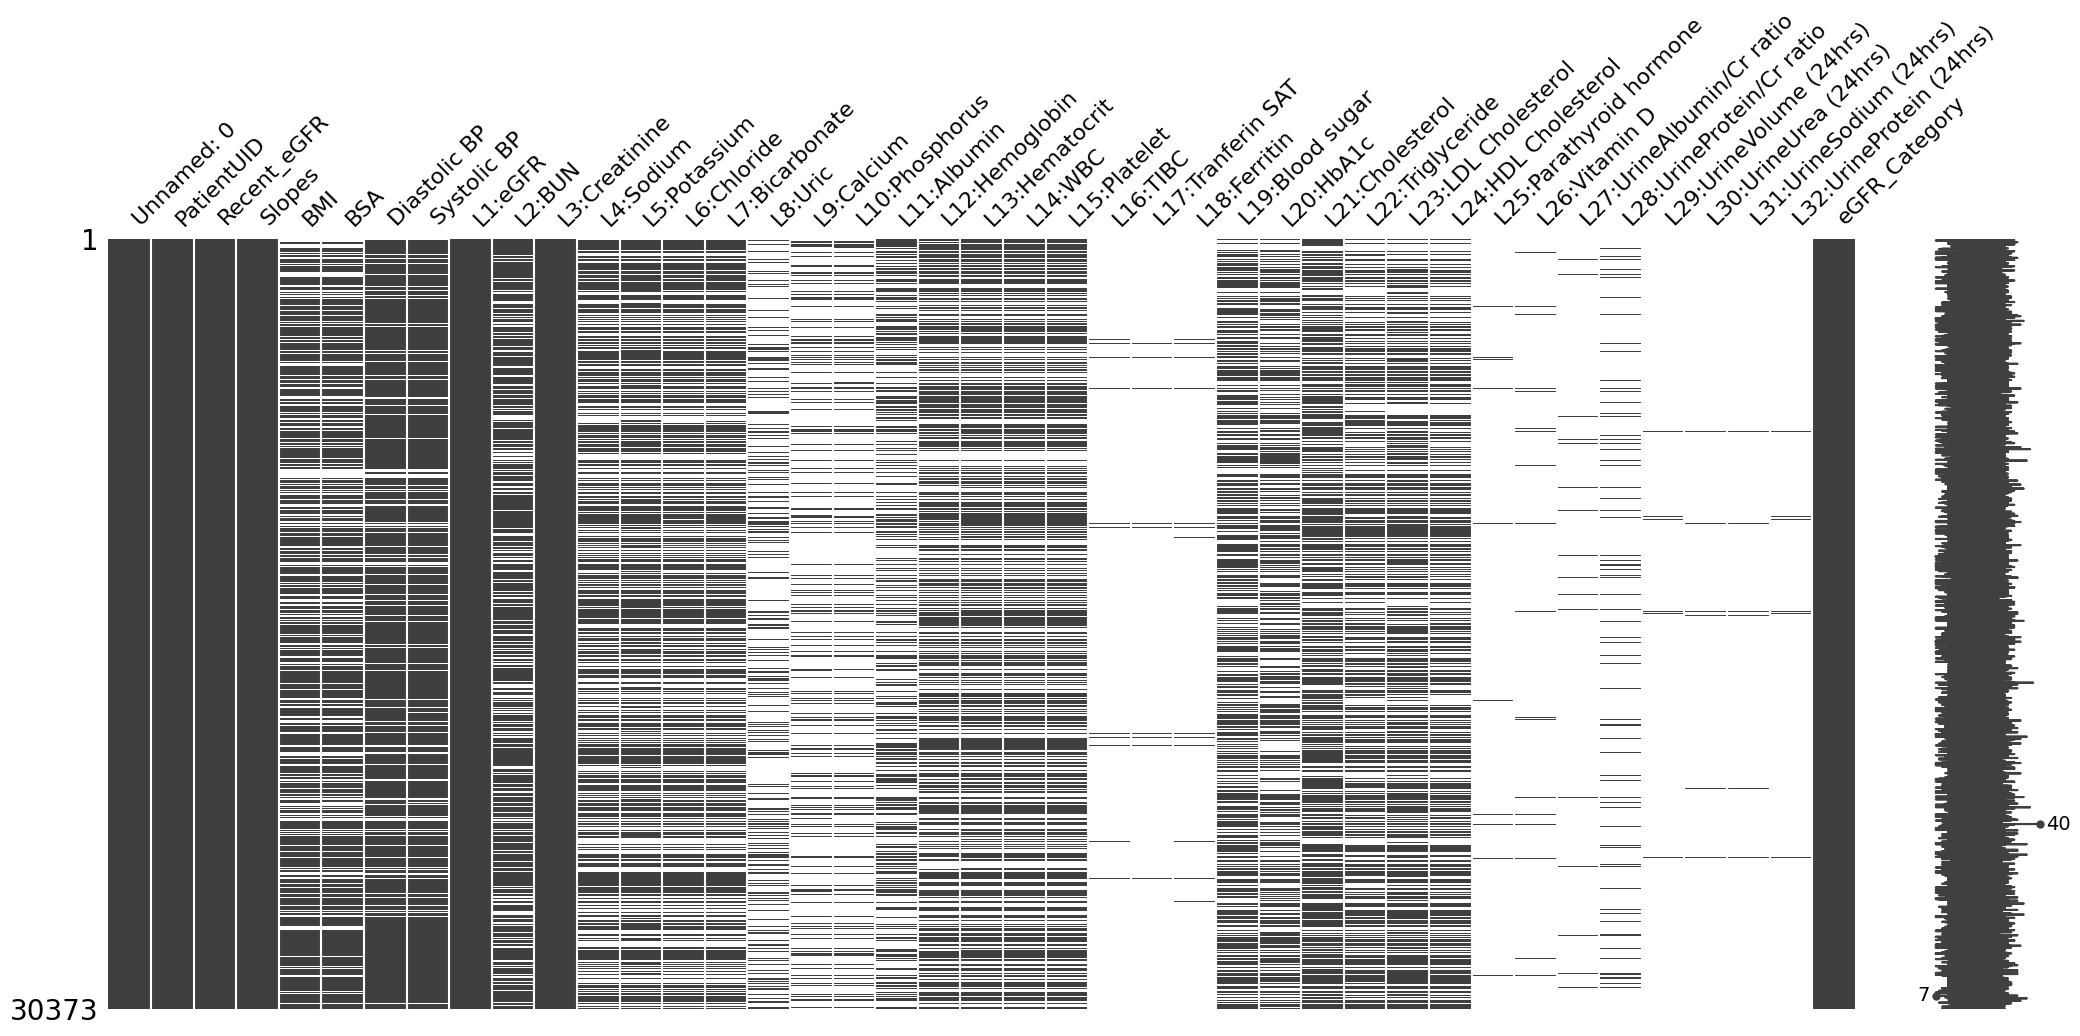

In [48]:
msno.matrix(slope2_sort)

<Axes: >

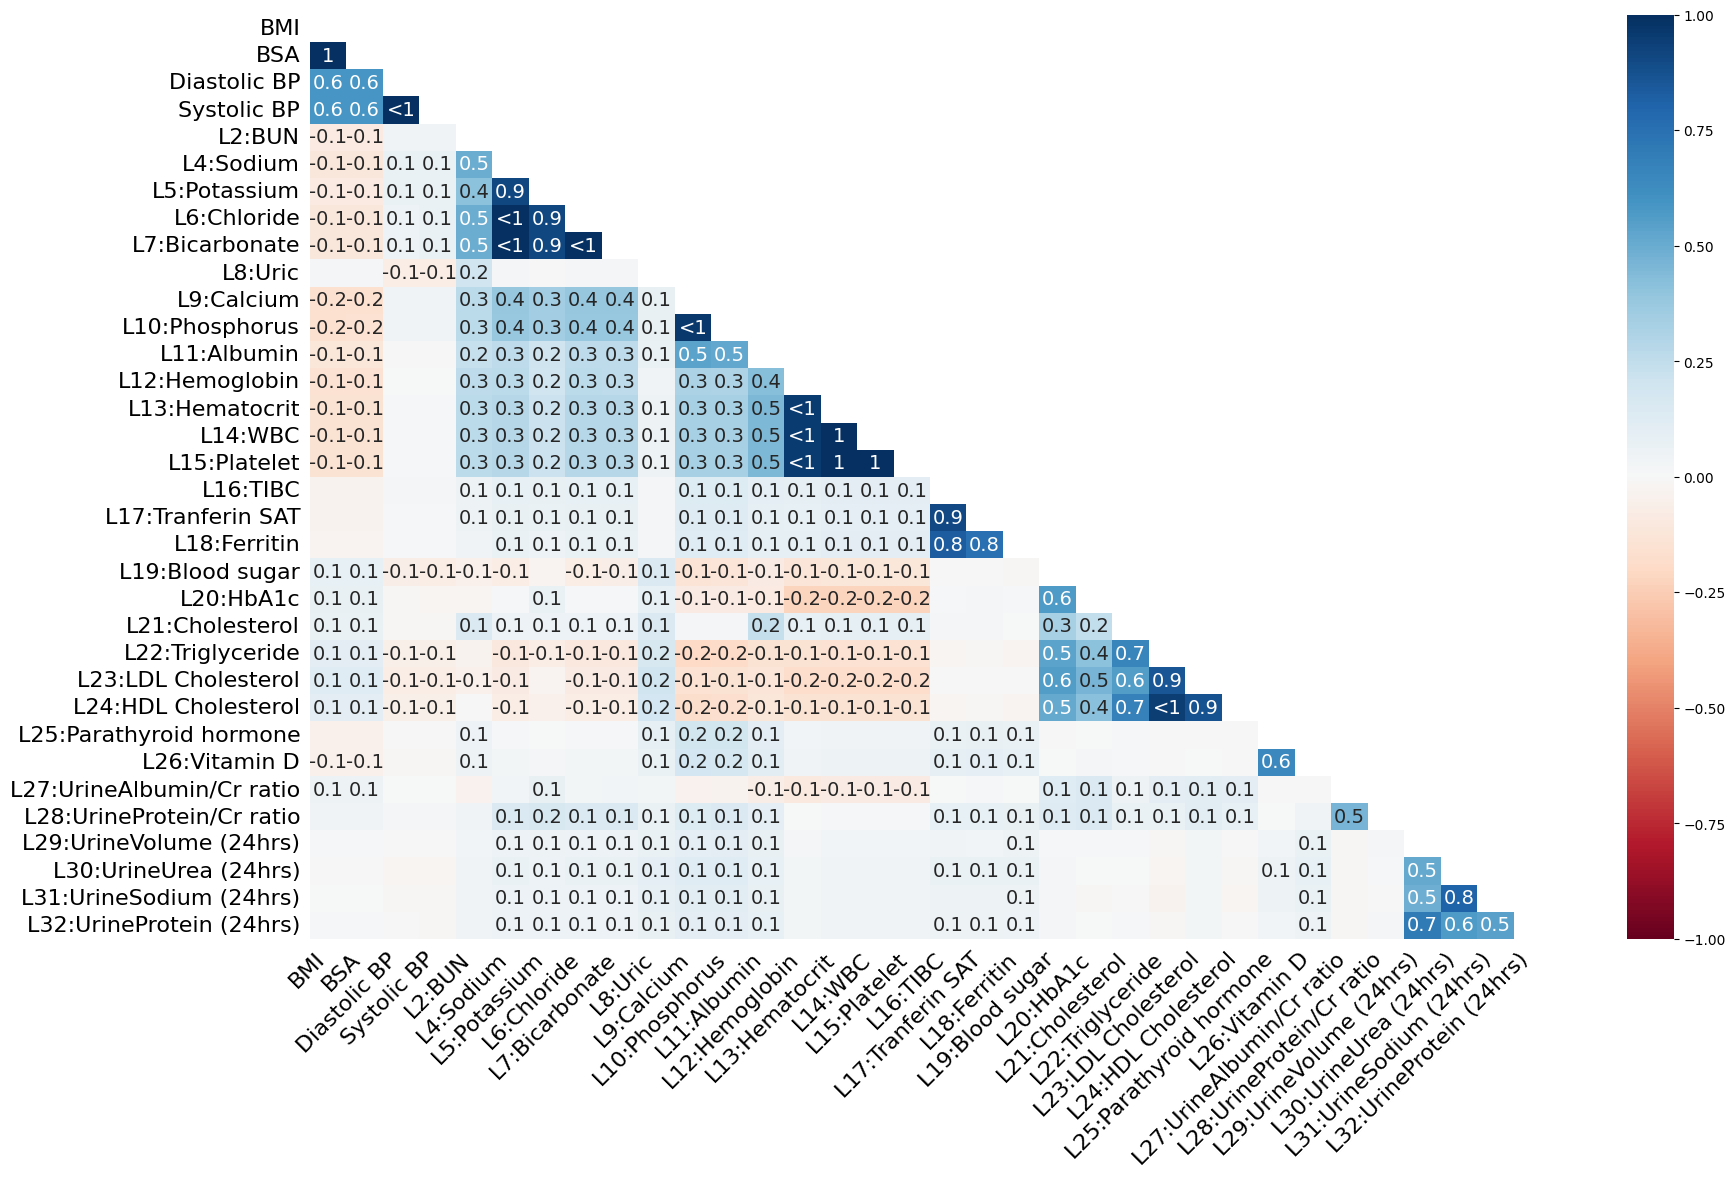

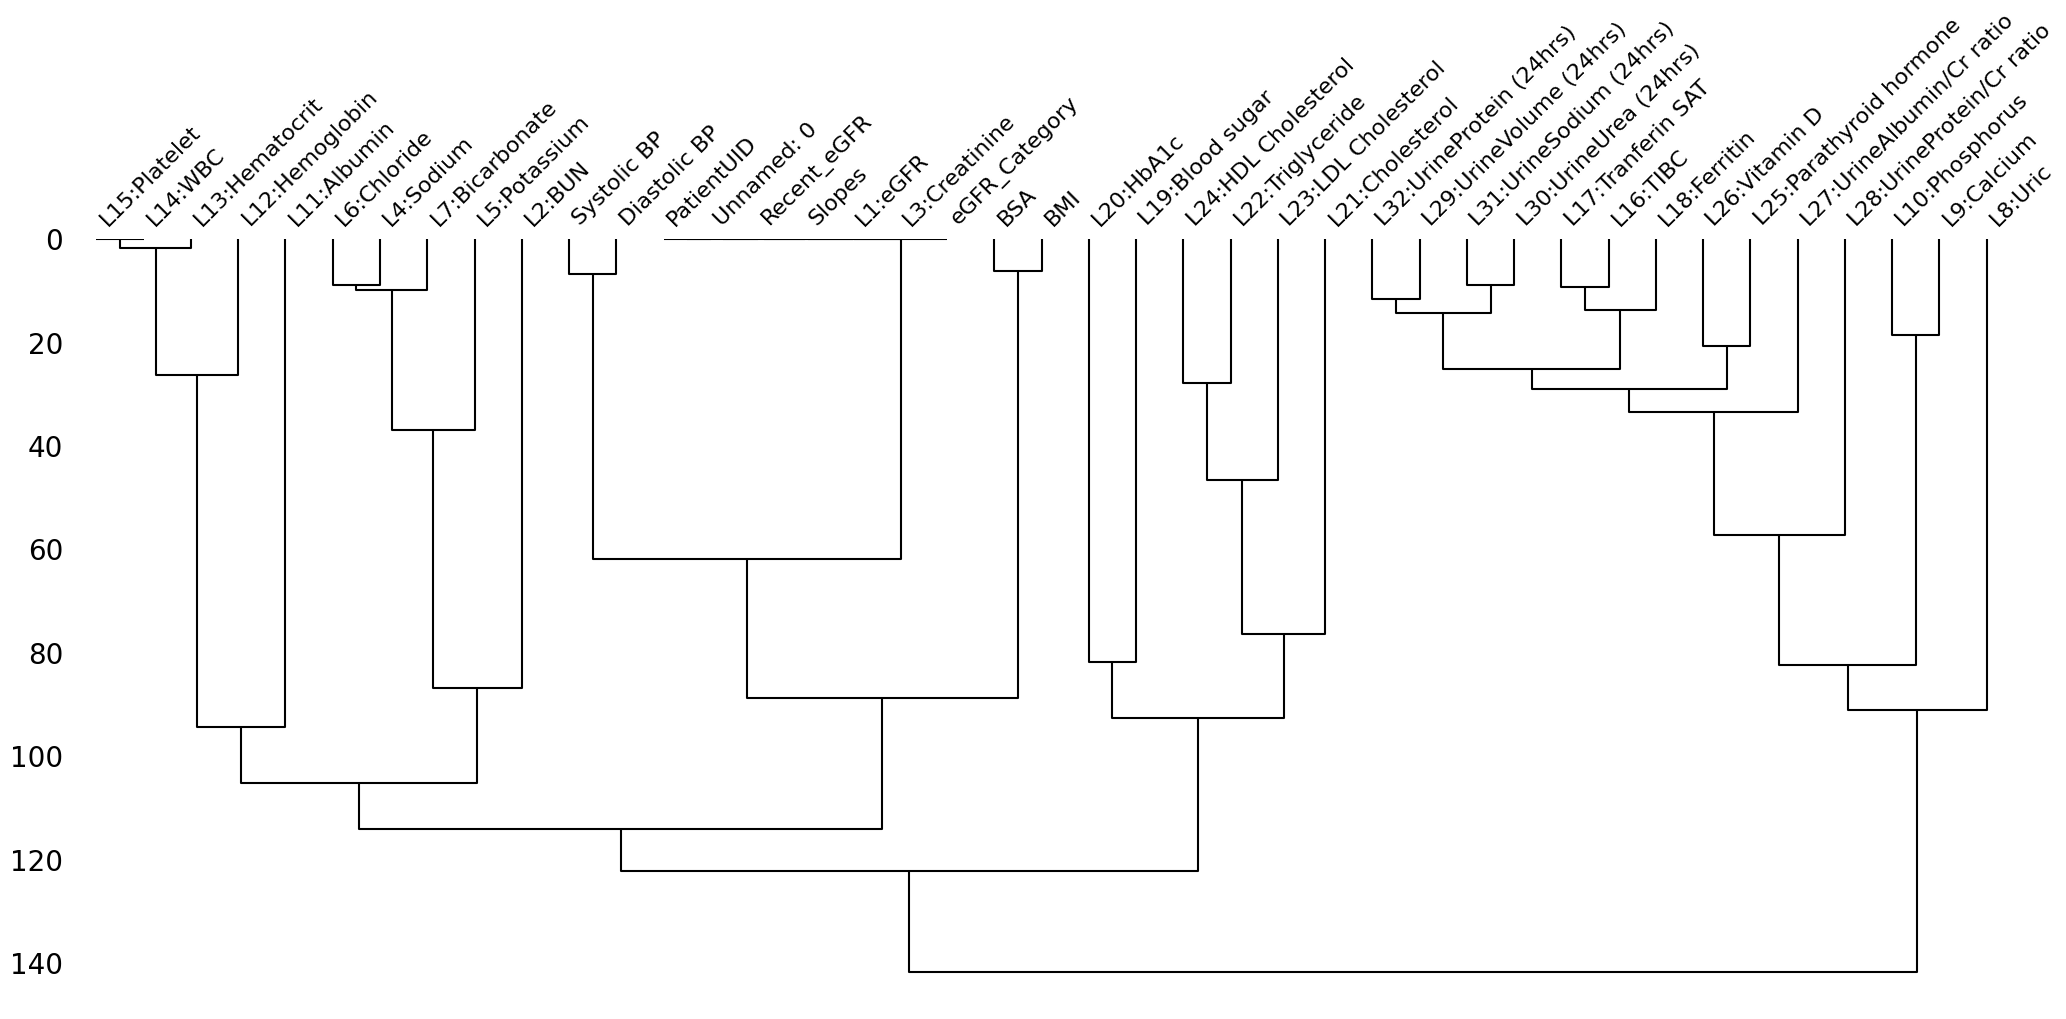

In [49]:
msno.heatmap(slope2_sort)
msno.dendrogram(slope2_sort)